In [226]:
import numpy as np
import matplotlib.pyplot as plt
import os
from decimal import Decimal
import pandas as pd
from scipy import stats as st
from scipy.optimize import curve_fit
import scipy.signal
from lmfit.models import *
import scipy.interpolate as interp
import matplotlib.colors as colors




In [227]:
#Building Dictionary

myBins = np.linspace(-.45, 0.45, 1024)
#stationList = [3.21, 3.38, 3.58, 3.80, 4.05, 4.33, 4.64, 5.01]
#stationList = [3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.]
stationList = [3.2, 3.6, 4.0, 4.4, 4.8]
energyList = []

for thing in stationList:
    for num in np.arange(-0.08, 0.13, 0.04):
        energy = round(float(Decimal(str(thing)) + Decimal(str(num))), 3)
        #if energy == 3.3 or energy == 3.33 or energy == 3.7 or energy in energyList:
        if energy in energyList:
            continue
        else:
            energyList.append(energy)
#print(energyList)
binDic = {}
sumDic = {}
for bin in myBins:
    binDic[bin] = {}

def Gauss(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i + 1]
        wid = params[i + 2]
        y = y + amp * np.exp(-((x - ctr) / wid) ** 2)
    return y

##Specify Mosaic
#folder = "Continuous_Ef_Stations_Calibration"
#folder = "Energy Station Info Mosaic 360"
#folder = "Energy Station Info Mosaic 30 Bad Sample Distance"
#folder = "8 Station Mosaic 30 Calibration"
#folder = "8 Station Mosaic 60 Calibration Toy Model Only"
#folder = "8 Station Mosaic 120 Calibration"

#folder = "5_Station_Mosaic_30_Calibration"
#folder = "5_Station_Mosaic_60_Calibration"
folder = "5_Station_Mosaic_120_Calibration"

#folder = "8_Station_Mosaic_30_Calibration"
#folder = "8_Station_Mosaic_60_Calibration"
#folder = "8_Station_Mosaic_120_Calibration"

#folder = "10_Station_Mosaic_30_Calibration"
#folder = "10_Station_Mosaic_60_Calibration"
#folder = "10_Station_Mosaic_120_Calibration"

#folder = "5_Ef_Calibration"
#folder = "5 Station Calibration Mosaic 30 2"
#folder = "5 Station Calibration Mosaic 120 v3"
#folder = "5 Station Calibration Mosaic 60 v3"

#folder = "10 Station Mosaic 30 Calibration v2"
#folder = "10 Station Mosaic 60 Calibration v2"
#folder = "10 Station Mosaic 120 Calibration v2"




#if folder == "8 Station Mosaic 60 Calibration Toy Model Only":

if folder == "8_Station_Mosaic_30_Calibration":
    deadzones = [(0.115-0.45, 0.165-0.45), (0.22-0.45, 0.27-0.45),
            (0.325-0.45, 0.37-0.45), (0.435-0.45, 0.48-0.45), 
            (0.53-0.45, 0.585-0.45),(0.635-0.45, 0.69 -0.45),
            (0.745-0.45, 0.805-0.45)]

if folder == "8_Station_Mosaic_60_Calibration":
    energyList += [4.52, 4.89]
    energyList.sort()
    deadzones = [(0.115-0.45, 0.165-0.45), (0.22-0.45, 0.27-0.45),
            (0.325-0.45, 0.37-0.45), (0.435-0.45, 0.47-0.45), 
            (0.535-0.45, 0.58-0.45),(0.64-0.45, 0.685 -0.45),
            (0.75-0.45, 0.8-0.45)]
    #print(len(energyList))

#if folder == "8 Station Mosaic 120 Calibration":
if folder == "8_Station_Mosaic_120_Calibration":
    energyList += [4.84, 4.88, 4.49, 4.21, 5.17, 5.21, 5.25, 4.53, 4.80]
    energyList.sort()
    print("File name is correct")
    #deadzones = [(0.145-0.45, 0.146-0.45), (0.245-0.45, 0.246-0.45),
    #        (0.349-0.45, 0.35-0.45), (0.45-0.45, 0.451-0.45), 
    #        (0.567-0.45, 0.568-0.45),(0.665-0.45, 0.666 -0.45),
    #        (0.779-0.45, 0.78-0.45)]
    #deadzones = [(0.105-0.45, 0.18-0.45), (0.205-0.45, 0.29-0.45),
    #        (0.315-0.45, 0.39-0.45), (0.425-0.45, 0.49-0.45), 
    #        (0.525-0.45, 0.6-0.45),(0.63-0.45, 0.70 -0.45),
    #        (0.74-0.45, 0.82-0.45)]
    deadzones = [(0.115-0.45, 0.17-0.45), (0.22-0.45, 0.275-0.45),
            (0.33-0.45, 0.375-0.45), (0.435-0.45, 0.48-0.45), 
            (0.535-0.45, 0.59-0.45),(0.64-0.45, 0.69 -0.45),
            (0.75-0.45, 0.81-0.45)]

if folder == "10_Station_Mosaic_120_Calibration":
    #deadzones = [(0.07-0.45, 0.125-0.45), (0.18-0.45, 0.23-0.45),
    #        (0.275-0.45, 0.325-0.45), (0.37-0.45, 0.415-0.45), 
    #        (0.455-0.45, 0.5-0.45),(0.54-0.45, 0.585 -0.45),
    #        (0.625-0.45, 0.665-0.45), (0.71-0.45, 0.755-0.45),
    #            (0.785-0.45, 0.83-0.45)]
    deadzones = [(0.065-0.45, 0.13-0.45), (0.175-0.45, 0.235-0.45),
            (0.27-0.45, 0.33-0.45), (0.365-0.45, 0.42-0.45), 
            (0.45-0.45, 0.505-0.45),(0.535-0.45, 0.59 -0.45),
            (0.62-0.45, 0.67-0.45), (0.705-0.45, 0.76-0.45),
                (0.78-0.45, 0.835-0.45)]
    energyList += [5.16, 5.20, 5.24]
    energyList.sort()
if folder == "10_Station_Mosaic_60_Calibration":
    deadzones = [(0.075-0.45, 0.125-0.45), (0.175-0.45, 0.22-0.45),
            (0.275-0.45, 0.305-0.45), (0.37-0.45, 0.405-0.45), 
            (0.46-0.45, 0.49-0.45),(0.55-0.45, 0.575 -0.45),
            (0.625-0.45, 0.655-0.45), (0.71-0.45, 0.74-0.45),
                (0.79-0.45, 0.815-0.45)]
    energyList.sort()
    
if folder == "10_Station_Mosaic_30_Calibration":
    deadzones = [(0.07-0.45, 0.125-0.45), (0.175-0.45, 0.22-0.45),
            (0.275-0.45, 0.315-0.45), (0.36-0.45, 0.405-0.45), 
            (0.45-0.45, 0.49-0.45),(0.535-0.45, 0.575 -0.45),
            (0.62-0.45, 0.655-0.45), (0.70-0.45, 0.735-0.45),
                (0.785-0.45, 0.815-0.45)]
    energyList.sort()
    
if folder == "5_Station_Mosaic_30_Calibration":
    deadzones = [(0.115-0.45, 0.265-0.45), (0.315-0.45, 0.45-0.45),
            (0.5-0.45, 0.62-0.45), (0.675-0.45, 0.79-0.45)]
    energyList.sort()
        

if folder == "5_Station_Mosaic_60_Calibration":
    energyList += [3.08, 3.48, 3.88, 4.28, 4.56, 4.68]
    deadzones = [(0.12-0.45, 0.255-0.45), (0.32-0.45, 0.44-0.45),
            (0.505-0.45, 0.615-0.45), (0.675-0.45, 0.785-0.45)]
    energyList.sort()

if folder =="5_Station_Mosaic_120_Calibration":
    print("hi")
    energyList = []
    deadzones = [(0.145-0.45, 0.23-0.45), (0.34-0.45, 0.425-0.45),
            (0.525-0.45, 0.605-0.45), (0.705-0.45, 0.77-0.45)]
    for thing in stationList:
        for num in np.arange(-0.20, 0.21, 0.04):
            if thing == 3.2 and (num == -0.2 or num == -0.16 or num == -0.12): 
                continue
            energy = round(float(Decimal(str(thing)) + Decimal(str(num))), 3)
            if energy == 3.3 or energy == 3.33 or energy == 3.7 or energy in energyList:
                continue
            else:
                energyList.append(energy)
    energyList += [5.04]

    
for Ei in energyList:
    if folder == "MANTA_Front-End_Calibration/8_Station":
        file = "Ei-" + str(Ei) #+ "/"
    else:
        file = "Ei-" + str(Ei) + "TwoTh15psi0/"
    #file = "Ei-" + str(Ei) + "TwoTh15psi0--format/"
    #file = "Ei-" + str(Ei) #+ "/"
    try:
        os.chdir("D:/Users/Adit/MANTA_CAMEA/Toy_Model/" + folder + "/" + file)
    except:
        print(f"This file {file} failed")
        print(Ei)
    dataPos = []
    dataIntensities = []
    for num in range(1, 8):
        try:
            a = open("ReuterStokes1_" + str(num) + "_1.psd")
            b = a.readlines()
            if len(stationList) == 10:
                startpoint = 49
            else:
                startpoint = 46
            for line in b[startpoint:]:
                j = line.split()
                loc = float(j[2])
                intensity = float(j[0]) * (10**20)
                dataPos.append(loc)
                if intensity > 0:
                    dataIntensities.append(intensity)
                else:
                    dataIntensities.append(0)
        except FileNotFoundError:
            continue
    for num in range(1, 7):
        try:
            a = open("ReuterStokes2_" + str(num) + "_1.psd")
            b = a.readlines()
            for line in b[startpoint:]:
                j = line.split()
                loc = float(j[2])
                intensity = float(j[0]) * (10**20)
                dataPos.append(loc)
                if intensity > 0:
                    dataIntensities.append(intensity)
                else:
                    dataIntensities.append(0)
        except FileNotFoundError:
            continue
    #mean, std = st.norm.fit(data)
    oldData, oldbins = np.histogram(dataPos, bins = 1024, weights = dataIntensities, range = (-0.45, 0.45))
    #fittedData = st.norm.pdf(myBins, mean, std)

    #plt.hist(data, bins = myBins, alpha = 0.5, color = "g")
    #newData, thebins = np.histogram(fittedData, bins = 1024, range = (-0.45, 0.45))

    #data.sort()
    #data = np.array(data)

    #difference = data[1:] - data[:-1]
    #difference = difference[difference > 0.01]
    #Npks = len(difference) + 1
    
    #i_pk = scipy.signal.find_peaks_cwt(oldData, widths=range(1, len(myBins)))
    i_pk, _ = scipy.signal.find_peaks(oldData, prominence=75, distance = 50)
    #print(oldData)
    """
    fakePeakIndices = []
    for i in range(len(i_pk)):
        if i != (len(i_pk) -1):
            if i_pk[i+1] - i_pk[i] <= 10:
                fakePeakIndices.append(i)
    i_pk = np.delete(i_pk, fakePeakIndices)
    """
    gaussMod = GaussianModel()
    pars = gaussMod.guess(data=oldData, x= myBins)
    modList = []
    for i in range(len(i_pk)):
        val = i_pk[i]
        gauss = GaussianModel(prefix='g' + str(i+1) + '_')
        pars.update(gauss.make_params())
        pars['g' + str(i+1) + '_center'].set(myBins[val])
        pars['g' + str(i+1) + '_sigma'].set(0.01)
        pars['g' + str(i+1) + '_amplitude'].set(oldData[val])
        modList.append(gauss)
    modArray = np.array(modList)
    mod = np.sum(modArray)
    try:
        init = mod.eval(pars, x=myBins)
    except:
        print(Ei)
        print(dataPos)
        plt.hist(oldData)
        plt.show()
        break
    #plt.plot(myBins, init)
    out = mod.fit(oldData, pars, x=myBins)
    #plt.plot(myBins, out.best_fit)
    """
    oldData = np.array(oldData)
    oldbins = np.array(oldbins)
    dx = (np.max(myBins) - np.min(myBins))/float(Npks)
    #print(np.ravel([oldbins[i], oldData[i], dx] for i in i_pk))
    guess = []
    for i in i_pk:
        guess += [myBins[i], oldData[i], dx]
    #guess = np.ravel([oldbins[i], oldData[i], dx] for i in i_pk)
    #print(guess.dtype)
    popt, pcov = curve_fit(Gauss, myBins, oldData, p0=guess)
    #print(popt)
    otherFit = Gauss(oldbins, *popt)
    plt.plot(oldbins, otherFit)
    #print(len(data))
    #print(np.sum(fittedData))
    #plt.plot(myBins, fittedData)
    """
    #plt.title("Fits of Ei-" + str(Ei))
    #plt.xlabel("Detector Position (m)")
    #plt.ylabel("Detector Counts")
    #plt.show()

    #counts = np.bincount(out.best_fit)
    #mysum = np.sum(out.best_fit)
    #sumDic[Ei] = mysum
    mySum = 0
    for index in range(0, len(myBins)):
        deadZoneChecker = False
        for tup in deadzones:
            if myBins[index] > tup[0] and myBins[index] < tup[1]:
                deadZoneChecker = True
        if deadZoneChecker == False:
            binDic[myBins[index]][Ei] = out.best_fit[index]
            mySum += out.best_fit[index]
        else:
            binDic[myBins[index]][Ei] = 0
    sumDic[Ei] = mySum
scaleDic = {}
maxEnergy = max(sumDic.values())
for akey in sumDic.keys():
    scaleDic[akey] = maxEnergy/sumDic[akey]
for akey in binDic.keys():
    for key2 in scaleDic.keys():
        
        ##Remove this
        #binDic[akey][key2] = binDic[akey][key2]
        if binDic[akey][key2] < 0:
            binDic[akey][key2] = 0
        else:
            binDic[akey][key2] = binDic[akey][key2] * scaleDic[key2]
            #binDic[akey][key2] = binDic[akey][key2]
proportionDic = {}
for akey in binDic.keys():
    proportionDic[akey] = {}
    sum = 0
    for e in binDic[akey].keys():
        sum += binDic[akey][e]
    for e in binDic[akey].keys():
        if sum == 0:
            proportionDic[akey][e] = 0
        else:
            proportionDic[akey][e] = binDic[akey][e]/sum
print("Proportion Dictionary built")

hi
Proportion Dictionary built


In [228]:
keyList = list(proportionDic.keys())
interval = keyList[1]-keyList[0]
mystep = interval/2

#folder = "Ei-5.2 Continuous Ef ORNL Source"
#folder = 'Ei-5.1 and Ei-5.2 Continuous Ef MANTA Unfocused'
#folder = "8 Station Mosaic 30 New"
#folder = "8 Station Mosaic 60 Ei-5.1 and Ei-5.3"
#deadzones = [(0.105-0.45, 0.18-0.45), (0.21-0.45, 0.285-0.45),
#            (0.32-0.45, 0.385-0.45), (0.425-0.45, 0.49-0.45), 
#            (0.525-0.45, 0.60-0.45),(0.63-0.45, 0.70 -0.45),
#            (0.74-0.45, 0.82-0.45)]


#folder = "5_Station_Mosaic_30"
#folder = "5_Station_Mosaic_60"
folder = "5_Station_Mosaic_120"

#folder = "8_Station_Mosaic_30"
#folder = "8_Station_Mosaic_60"
#folder = "8_Station_Mosaic_120"

#folder = "10_Station_Mosaic_30"
#folder = "10_Station_Mosaic_60"
#folder = "10_Station_Mosaic_120"


#deadzones = [(0.115-0.45, 0.17-0.45), (0.22-0.45, 0.275-0.45),
#            (0.33-0.45, 0.375-0.45), (0.435-0.45, 0.48-0.45), 
#            (0.535-0.45, 0.59-0.45),(0.64-0.45, 0.69 -0.45),
#            (0.75-0.45, 0.81-0.45)]
#folder = "10 Station Mosaic 60"
#folder = "Ei-5.1 ORNL Union"
#folder = "Ei-5.1 ORNL Toy Model Official"
#folder = "Ei-5.1 Mosaic 120"
#folder = "Ei-5.1 Union 2"
#folder = "Ei-5.1 5.2 and 5.3 5 Station"
#folder = "Ei-5.1 Full Run Analyzer Mosaic 30"
#folder = "5 Station Mosaic 30"
#folder = "5 Station Mosaic 60"
#folder = "5 Station Mosaic 120"
#folder = "5 Station Mosaic 120 Detector Test"
#folder = "10 Station Mosaic 30"
#folder = "10 Station Mosaic 60"
#folder = "10 Station Mosaic 120"
def energyIntensity(Ei,Psi, fake):
    if folder == "10_Station_Mosaic_30" or folder == "10_Station_Mosaic_60" or folder == "10_Station_Mosaic_120":
        startpoint = 49
    else:
        startpoint = 46
    deltaElist = []
    #EfLister = [3.21, 3.38, 3.58, 3.8, 4.05, 4.33, 4.64, 5.01]
    infodict = {}
    events = {}
    for Ef in energyList:
        deltaE = Decimal(str(Ei))-Decimal(str(Ef))
        deltaE = float(deltaE)
        deltaElist.append(deltaE)
        infodict[deltaE] = 0
    ##Take this out as necessary
    #if Psi // 5 == Psi/5:
    #    Psi = int(Psi)
    #infodict = {3.79: 0, 3.62: 0, 3.42: 0, 3.2: 0, 2.95: 0, 2.67: 0, 2.36: 0, 1.99: 0}
    file = "Ei-" + str(Ei) + "TwoTh" + str(fake) + "psi" + str(Psi)  # + "Ei6"
    #file = "Ei" + str(Ei) + "Psi" + str(Psi) + "TwoTh" + str(fake)  # + "Ei6"
    #file = "TwoTh" + str(fake)
    try:
        #os.chdir("D:/Users/Adit/MANTA_CAMEA/Full_MANTA/" + folder + "/" + file)
        os.chdir(f"D:/Users/Adit/MANTA_CAMEA/Toy_Model/{folder}/" + file)
    except:
        print("this directory " + str(file) +' does not exist')
        return 0
    #ei=7
    try:
        c = open("maya.dat")
        d = c.readlines()
    except:
        print(file)
    #e = d[10]
    h = d[10].split('=')
    ang = float(h[-1])
    elist = []
    for channel in range(1, 2, 2):
        for detArray in range(1,3):
            if detArray == 1:

                detNum = 7
                detAngList = np.array([-3.33, -2.22, -1.11, 0., 1.11, 2.22, 3.33])
                ##detScaleListdata taken from PSD_Test_6
                maxIntensity = 0.14303685000468921
                detIntensities = np.array([0.13089832195611126, 0.13790526626416955, 0.13918998376435673,
                                          0.14303685000468921, 0.14091723772990974, 0.13581299157844018,
                                           0.12982420935259995])
                detScaleList = maxIntensity/detIntensities
            elif detArray == 2:
                detNum = 6
                detAngList = np.array([-2.775, -1.665, -0.55, 0.555, 1.665, 2.775])
                ##detScaleList data taken from PSD_Test_6
                maxIntensity = 0.14303685000468921
                detIntensities = np.array([0.11136671913778005, 0.11499442848708014, 0.11424443083265293,
                                          0.1129125419684303, 0.11135280201859996, 0.11022459939836991])
                detScaleList = maxIntensity/detIntensities
            for det in range(detNum):
                if detArray == 1 and det == 3:
                    continue
            
                realTwoTh = ang + ((channel-1) * 7.5) - detAngList[det]
        
                deltaElist = []
                #EfLister = [3.21, 3.38, 3.58, 3.8, 4.05, 4.33, 4.64, 5.01]
                infodict = {}
                events = {}
                for Ef in energyList:
                    deltaE = Decimal(str(Ei))-Decimal(str(Ef))
                    deltaE = float(deltaE)
                    deltaElist.append(deltaE)
                    infodict[deltaE] = 0
                try:
                    a = open(f"ReuterStokes{str(detArray)}_{str(det+1)}_{channel}.psd")
                    b = a.readlines()
                    for line in b[startpoint:]:
                        j = line.split()
                        if len(j) == 4:
                            continue
                        #if float(j[2]) < 0.007 and float(j[2]) > -0.015:
                        #    print(j)
                        loc = float(j[2])
                        intensity = float(j[0])
                        #events[loc] = intensity * 10**12 * detScaleList[det]
                        for deadzone in deadzones:
                            if loc > deadzone[0] and loc < deadzone[1]:
                                intensity = 0
                        if loc in events.keys():
                            events[loc] += intensity * 10**12
                        else:
                            events[loc] = intensity * 10**12
                except FileNotFoundError:
                    continue
                for event in events.keys():
    
                    #print(event)
                    minimizer = np.abs(np.array(keyList) - event)
                    #print(minimizer)
                    index = np.argmin(minimizer)
                    #index = np.where(minimizer == minimizer.min())
                    #print(float(index)
                    key = keyList[int(index)]
                    for energy in proportionDic[key].keys():
                        delE = float(Decimal(str(Ei)) - Decimal(str(energy)))
                        infodict[delE] += proportionDic[key][energy] * events[event]
                        #if file == "Ei-5.27TwoTh35psi37.5":
                        if True:
                            twoth = realTwoTh
                            ef = energy
                            ei = Ei
                            wavelength = np.sqrt(81.8047/ei)
                            ki = 2*np.pi/wavelength
                            wavelength2 = np.sqrt(81.8047/ef)
                            kf = 2*np.pi/wavelength2
                            rad = twoth*np.pi/180 #converting to radians
                            TwoTh_rad = rad
                            Q = ki**2 + kf**2 - 2* ki * kf *np.cos(rad)
                            Q = np.sqrt(Q)
                            realpsi = (Psi*np.pi)/180
                            psi_rad = realpsi
                            Qx = ki*np.cos(-1*psi_rad) - kf*np.cos(-1*psi_rad+TwoTh_rad)
                            Qy = ki*np.sin(-1*psi_rad) - kf*np.sin(-1*psi_rad+TwoTh_rad)
                            nCount = events[event]
                            if Qy < -1.9 and Qy > -2.1:
                                if Qx < 0.4 and Qx > -0.1:
                                    if delE >1.3 and delE < 1.5:
                                        if nCount > 1000:
                                            print("Success!")
                                            print(file)
                                            print(delE)
                for akey in infodict.keys():
                    elist += [(realTwoTh, akey, infodict[akey])]
    painList = []
    #Ei = Ei/10000
    for entry in elist:
        ei = Ei
        ef = Decimal(str(Ei))-Decimal(str(entry[1]))
        ef = float(ef)
        twoth = entry[0]
        twoth = twoth
        wavelength = np.sqrt(81.8047/ei)
        ki = 2*np.pi/wavelength
        wavelength2 = np.sqrt(81.8047/ef)
        kf = 2*np.pi/wavelength2
        scaleFactor = ki/kf
        #boy = 180-ang
        rad = twoth*np.pi/180 #converting to radians
        TwoTh_rad = rad
        #psi = 0
        Q = ki**2 + kf**2 - 2* ki * kf *np.cos(rad)
        Q = np.sqrt(Q)
        realpsi = (Psi*np.pi)/180
        psi_rad = realpsi
        Qx = ki*np.cos(-1*psi_rad) - kf*np.cos(-1*psi_rad+TwoTh_rad)
        Qy = ki*np.sin(-1*psi_rad) - kf*np.sin(-1*psi_rad+TwoTh_rad)
        #realpsi = 0
        #Qx = math.sin(-realpsi-rad/2)*Q
        #*math.sin(rad/2)
        #Qy = math.cos(-realpsi-rad/2)*Q
        #*math.cos(rad/2)
        nCount = entry[2]
        nCount = nCount * ki/kf
        painList.append((Psi, entry[1], nCount, ang, Qx, Qy))
        #a = 6.28
        #h = Qx*a/(2*math.pi)
        #k = Qy*a/(2*math.pi)
        #painList.append((Psi, entry[1], entry[2], ang, h, k))
    return painList





"""
def energyIntensity(Ei,Psi, fake):
    deltaElist = []
    #EfLister = [3.21, 3.38, 3.58, 3.8, 4.05, 4.33, 4.64, 5.01]
    infodict = {}
    events = []
    for Ef in energyList:
        deltaE = Decimal(str(Ei))-Decimal(str(Ef))
        deltaE = float(deltaE)
        deltaElist.append(deltaE)
        infodict[deltaE] = 0
    ##Take this out as necessary
    #if Ei == 5.1 and Psi//5 == Psi/5 and folder == "8 Station Mosaic 30":
    #    Psi = int(Psi)

    #if Psi // 5 == Psi/5:
    #    Psi = int(Psi)
    #infodict = {3.79: 0, 3.62: 0, 3.42: 0, 3.2: 0, 2.95: 0, 2.67: 0, 2.36: 0, 1.99: 0}
    file = "Ei-" + str(Ei) + "TwoTh" + str(fake) + "psi" + str(Psi)  # + "Ei6"
    #file = "Ei-" + str(Ei) + "TwoTh" + str(fake) + "psi" + str(float(Psi))  
    #file = "Ei" + str(Ei) + "Psi" + str(Psi) + "TwoTh" + str(fake)  # + "Ei6"
    #file = "TwoTh" + str(fake)
    try:
        os.chdir("D:/Users/Adit/MANTA_CAMEA/Toy_Model/" + folder + "/" + file)
        #os.chdir("D:/Users/Adit/MANTA_CAMEA/Toy_Model/" + file)
    except:
        print("this directory " + str(file) +' does not exist')
        return 0
    #ei=7
    try:
        c = open("maya.dat")
        d = c.readlines()
    except:
        print(file)
    #e = d[10]
    h = d[10].split('=')
    ang = float(h[-1])
    for num in range(1,8):
        try:
            a = open("ReuterStokes1_" + str(num) + "_1.psd")
            b = a.readlines()
            for line in b[startpoint:]:
                j = line.split()
                if len(j) == 4:
                    continue
                #if float(j[2]) < 0.007 and float(j[2]) > -0.015:
                #    print(j)
                loc = float(j[2])
                events.append(loc)
        except FileNotFoundError:
            continue

    for num in range(1,7):
        try:
            a = open("ReuterStokes2_" + str(num) + "_1.psd")
            b = a.readlines()
            for line in b[startpoint:]:
                j = line.split()
                if len(j) == 4:
                    continue
                loc = float(j[2])
                events.append(loc)
        except FileNotFoundError:
                continue
    for event in events:
        #print(event)
        minimizer = np.abs(np.array(keyList) - event)
        #print(minimizer)
        index = np.argmin(minimizer)
        #index = np.where(minimizer == minimizer.min())
        #print(float(index)
        key = keyList[int(index)]
        for energy in proportionDic[key].keys():
            delE = float(Decimal(str(Ei)) - Decimal(str(energy)))
            if folder == "8 Station Mosaic 30" and Ei == 5.27:
                if proportionDic[key][energy] <0 :
                    infodict[delE] += 0
            else:
                infodict[delE] += proportionDic[key][energy]
    elist = []
    for akey in infodict.keys():
        elist += [(ang, akey, infodict[akey])]
    painList = []
    #Ei = Ei/10000
    for entry in elist:
        ei = Ei
        ef = Decimal(str(Ei))-Decimal(str(entry[1]))
        ef = float(ef)
        ang = entry[0]
        ang = ang
        wavelength = np.sqrt(81.8047/ei)
        ki = 2*np.pi/wavelength
        wavelength2 = np.sqrt(81.8047/ef)
        kf = 2*np.pi/wavelength2
        #boy = 180-ang
        rad = ang*np.pi/180 #converting to radians
        TwoTh_rad = rad
        #psi = 0
        Q = ki**2 + kf**2 - 2* ki * kf *np.cos(rad)
        Q = np.sqrt(Q)
        realpsi = (Psi*np.pi)/180
        psi_rad = realpsi
        Qx = ki*np.cos(-1*psi_rad) - kf*np.cos(-1*psi_rad+TwoTh_rad)
        Qy = ki*np.sin(-1*psi_rad) - kf*np.sin(-1*psi_rad+TwoTh_rad)
        nCount = entry[2]
        nCount = nCount * ki/kf
        #realpsi = 0
        #Qx = math.sin(-realpsi-rad/2)*Q
        #*math.sin(rad/2)
        #Qy = math.cos(-realpsi-rad/2)*Q
        #*math.cos(rad/2)
        painList.append((Psi, entry[1], nCount, ang, Qx, Qy))
        #a = 6.28
        #h = Qx*a/(2*math.pi)
        #k = Qy*a/(2*math.pi)
        #painList.append((Psi, entry[1], entry[2], ang, h, k))
    return painList
"""

'\ndef energyIntensity(Ei,Psi, fake):\n    deltaElist = []\n    #EfLister = [3.21, 3.38, 3.58, 3.8, 4.05, 4.33, 4.64, 5.01]\n    infodict = {}\n    events = []\n    for Ef in energyList:\n        deltaE = Decimal(str(Ei))-Decimal(str(Ef))\n        deltaE = float(deltaE)\n        deltaElist.append(deltaE)\n        infodict[deltaE] = 0\n    ##Take this out as necessary\n    #if Ei == 5.1 and Psi//5 == Psi/5 and folder == "8 Station Mosaic 30":\n    #    Psi = int(Psi)\n\n    #if Psi // 5 == Psi/5:\n    #    Psi = int(Psi)\n    #infodict = {3.79: 0, 3.62: 0, 3.42: 0, 3.2: 0, 2.95: 0, 2.67: 0, 2.36: 0, 1.99: 0}\n    file = "Ei-" + str(Ei) + "TwoTh" + str(fake) + "psi" + str(Psi)  # + "Ei6"\n    #file = "Ei-" + str(Ei) + "TwoTh" + str(fake) + "psi" + str(float(Psi))  \n    #file = "Ei" + str(Ei) + "Psi" + str(Psi) + "TwoTh" + str(fake)  # + "Ei6"\n    #file = "TwoTh" + str(fake)\n    try:\n        os.chdir("D:/Users/Adit/MANTA_CAMEA/Toy_Model/" + folder + "/" + file)\n        #os.chdir("D:/

In [229]:
#format of tup in tuplist ((Psi, etransferred, ncount, ang, Qx, Qy))
tuplist = []
#Eilist = [4,5.5,7,8.5,10,11.5,13]
#Eilist = [4, 5.5, 7, 8.5, 10, 11.5]
EiList = [5.1, 5.3]
for Ei in EiList:
    for num in range(2, 59,1):
    #    for boy in range(0, 91, 5):
    #will need to swap this out depending on if its a float or not 
        #for boy in np.arange(0,361.0, 5.0):
        #    if boy % 5 == 0:
        #        boy = int(boy)
        for boy in np.arange(0,181, 2.5):
            #num = int(num*10)/100
            boy = float(boy)
            #f Ei == 5.27:
            #   boy = float(boy)
            values = energyIntensity(Ei, boy, num)
            if type(values) == list:
                tuplist += values

#print(tuplist)



Success!
Ei-5.1TwoTh36psi35.0
1.38
Success!
Ei-5.1TwoTh36psi35.0
1.34
Success!
Ei-5.1TwoTh36psi35.0
1.38
Success!
Ei-5.1TwoTh36psi35.0
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh36psi37.5
1.42
Success!
Ei-5.1TwoTh36psi37.5
1.38
Success!
Ei-5.1TwoTh36psi37.5
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh36psi47.5
1.46
Success!
Ei-5.1TwoTh36psi47.5
1.42
Success!
Ei-5.1TwoTh36psi47.5
1.38
Success!
Ei-5.1TwoTh36psi47.5
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh37psi47.5
1.46
Success!
Ei-5.1TwoTh37psi47.5
1.42
Success!
Ei-5.1TwoTh37psi47.5
1.38
Success!
Ei-5.1TwoTh37psi47.5
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh38psi45.0
1.46
Success!
Ei-5.1TwoTh38psi45.0
1.42
Success!
Ei-5.1TwoTh38psi45.0
1.38
Success!
Ei-5.1TwoTh38psi45.0
1.34
Success!
Ei-5.1TwoTh38psi45.0
1.46
Success!
Ei-5.1TwoTh38psi45.0
1.42
Success!
Ei-5.1TwoTh38psi45.0
1.38
Success!
Ei-5.1TwoTh38psi45.0
1.34
Success!
Ei-5.1TwoTh38psi45.0
1.46
Success!
Ei-5.1TwoTh38psi45.0
1.42
Success!
Ei-5.1TwoTh38psi45.0
1.38
Success!
Ei-5.1TwoTh38psi45.0
1.34
Success!
Ei-5.1TwoTh38psi45.0
1.46
Success!
Ei-5.1TwoTh38psi45.0
1.42
Success!
Ei-5.1TwoTh38psi45.0
1.38
Success!
Ei-5.1TwoTh38psi45.0
1.34
Success!
Ei-5.1TwoTh38psi45.0
1.46
Success!
Ei-5.1TwoTh38psi45.0
1.42
Success!
Ei-5.1TwoTh38psi45.0
1.38
Success!
Ei-5.1TwoTh38psi45.0
1.34
Success!
Ei-5.1TwoTh38psi47.5
1.46
Success!
Ei-5.1TwoTh38psi47.5
1.42
Success!
Ei-5.1TwoTh38psi47.5
1.38
Success!
Ei-5.1TwoTh38psi47.5
1.34
Success!
Ei-5.1TwoTh38psi47.5
1.46
Success!
Ei-5.1TwoTh38psi47.5
1.42
Success!
Ei-5.1TwoTh38psi47.5
1.38
Success!
Ei-5.1TwoTh38psi47.5
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh39psi37.5
1.46
Success!
Ei-5.1TwoTh39psi37.5
1.42
Success!
Ei-5.1TwoTh39psi37.5
1.38
Success!
Ei-5.1TwoTh39psi37.5
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh39psi50.0
1.46
Success!
Ei-5.1TwoTh39psi50.0
1.42
Success!
Ei-5.1TwoTh39psi50.0
1.38
Success!
Ei-5.1TwoTh39psi50.0
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh40psi47.5
1.46
Success!
Ei-5.1TwoTh40psi47.5
1.42
Success!
Ei-5.1TwoTh40psi47.5
1.38
Success!
Ei-5.1TwoTh40psi47.5
1.34
Success!
Ei-5.1TwoTh

Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.38
Success!
Ei-5.1TwoTh41psi52.5
1.34
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.38
Success!
Ei-5.1TwoTh41psi52.5
1.34
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.38
Success!
Ei-5.1TwoTh41psi52.5
1.34
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.38
Success!
Ei-5.1TwoTh41psi52.5
1.34
Success!
Ei-5.1TwoTh41psi52.5
1.46
Success!
Ei-5.1TwoTh41psi52.5
1.42
Success!
Ei-5.1TwoTh41psi52.5
1.38
Success!
Ei-5.1TwoTh41psi52.5
1.34
Success!
Ei-5.1TwoTh42psi45.0
1.46
Success!
Ei-5.1TwoTh42psi45.0
1.42
this directory Ei-5.

Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.46
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.46
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.46
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh37psi35.0
1.34
Success!
Ei-5.3TwoTh37psi35.0
1.46
Success!
Ei-5.3TwoTh37psi35.0
1.42
Success!
Ei-5.3TwoTh37psi35.0
1.38
Success!
Ei-5.3TwoTh

Success!
Ei-5.3TwoTh37psi47.5
1.42
Success!
Ei-5.3TwoTh37psi47.5
1.38
Success!
Ei-5.3TwoTh37psi47.5
1.34
Success!
Ei-5.3TwoTh37psi47.5
1.42
Success!
Ei-5.3TwoTh37psi47.5
1.38
Success!
Ei-5.3TwoTh37psi47.5
1.34
Success!
Ei-5.3TwoTh37psi50.0
1.46
Success!
Ei-5.3TwoTh37psi50.0
1.46
Success!
Ei-5.3TwoTh38psi35.0
1.46
Success!
Ei-5.3TwoTh38psi35.0
1.42
Success!
Ei-5.3TwoTh38psi35.0
1.38
Success!
Ei-5.3TwoTh38psi35.0
1.34
Success!
Ei-5.3TwoTh38psi35.0
1.46
Success!
Ei-5.3TwoTh38psi35.0
1.42
Success!
Ei-5.3TwoTh38psi35.0
1.38
Success!
Ei-5.3TwoTh38psi35.0
1.34
Success!
Ei-5.3TwoTh38psi37.5
1.46
Success!
Ei-5.3TwoTh38psi37.5
1.42
Success!
Ei-5.3TwoTh38psi37.5
1.38
Success!
Ei-5.3TwoTh38psi37.5
1.34
Success!
Ei-5.3TwoTh38psi37.5
1.46
Success!
Ei-5.3TwoTh38psi37.5
1.42
Success!
Ei-5.3TwoTh38psi37.5
1.38
Success!
Ei-5.3TwoTh38psi37.5
1.34
Success!
Ei-5.3TwoTh38psi37.5
1.46
Success!
Ei-5.3TwoTh38psi37.5
1.42
Success!
Ei-5.3TwoTh38psi37.5
1.38
Success!
Ei-5.3TwoTh38psi37.5
1.34
Success!
Ei-5.3TwoTh

Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh38psi47.5
1.46
Success!
Ei-5.3TwoTh38psi47.5
1.42
Success!
Ei-5.3TwoTh38psi47.5
1.38
Success!
Ei-5.3TwoTh38psi47.5
1.34
Success!
Ei-5.3TwoTh

Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh39psi47.5
1.38
Success!
Ei-5.3TwoTh39psi47.5
1.34
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh39psi47.5
1.38
Success!
Ei-5.3TwoTh39psi47.5
1.34
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh39psi47.5
1.38
Success!
Ei-5.3TwoTh39psi47.5
1.34
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh39psi47.5
1.38
Success!
Ei-5.3TwoTh39psi47.5
1.34
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh39psi47.5
1.38
Success!
Ei-5.3TwoTh39psi47.5
1.34
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh39psi47.5
1.38
Success!
Ei-5.3TwoTh39psi47.5
1.34
Success!
Ei-5.3TwoTh39psi47.5
1.46
Success!
Ei-5.3TwoTh39psi47.5
1.42
Success!
Ei-5.3TwoTh

Success!
Ei-5.3TwoTh40psi50.0
1.46
Success!
Ei-5.3TwoTh40psi50.0
1.42
Success!
Ei-5.3TwoTh40psi50.0
1.38
Success!
Ei-5.3TwoTh40psi50.0
1.34
Success!
Ei-5.3TwoTh40psi50.0
1.46
Success!
Ei-5.3TwoTh40psi50.0
1.42
Success!
Ei-5.3TwoTh40psi50.0
1.38
Success!
Ei-5.3TwoTh40psi50.0
1.34
Success!
Ei-5.3TwoTh40psi50.0
1.46
Success!
Ei-5.3TwoTh40psi50.0
1.42
Success!
Ei-5.3TwoTh40psi50.0
1.38
Success!
Ei-5.3TwoTh40psi50.0
1.34
Success!
Ei-5.3TwoTh40psi50.0
1.46
Success!
Ei-5.3TwoTh40psi50.0
1.42
Success!
Ei-5.3TwoTh40psi50.0
1.38
Success!
Ei-5.3TwoTh40psi50.0
1.34
Success!
Ei-5.3TwoTh41psi42.5
1.46
Success!
Ei-5.3TwoTh41psi42.5
1.42
Success!
Ei-5.3TwoTh41psi42.5
1.38
Success!
Ei-5.3TwoTh41psi42.5
1.34
Success!
Ei-5.3TwoTh41psi42.5
1.46
Success!
Ei-5.3TwoTh41psi42.5
1.42
Success!
Ei-5.3TwoTh41psi42.5
1.38
Success!
Ei-5.3TwoTh41psi42.5
1.34
Success!
Ei-5.3TwoTh41psi42.5
1.46
Success!
Ei-5.3TwoTh41psi42.5
1.42
Success!
Ei-5.3TwoTh41psi42.5
1.38
Success!
Ei-5.3TwoTh41psi42.5
1.34
Success!
Ei-5.3TwoTh

In [230]:
tuplist = sorted(tuplist, key = lambda x: x[2])

In [231]:

Qxlist = []
Qylist = []
newzlist = []
neutroncountlist = []
#xlist1 = []
ylist = []
zlist = []
zlist3 = []
for tup in tuplist:
    #if tup[2] >0:
     if True:
        #xlist1 += [tup[0]]
        ylist += [tup[1]]
        zlist += [tup[2]]
        Qxlist += [tup[-2]]
        Qylist += [tup[-1]]
        newzlist += [tup[1]]
        neutroncountlist += [tup[2]]
    #zlist3.append((tup[1], tup[2]))
pray = []

testNeutronCountList = np.array(neutroncountlist)
allNeutrons = np.sum(testNeutronCountList)
print("this is all my neutrons")
print(allNeutrons)
#print(min(Qylist))
#print(max(Qxlist))
#print(max(Qylist))
#print(pray)
#print(len(newzlist))
hugeDict = {}

#Eflist = energyList
#Etransferredlist = []
#for Ei in EiList:
#    for Ef in Eflist:
#        delta = Decimal(str(Ei)) - Decimal(str(Ef))
#        delta = float(delta)
#        Etransferredlist.append(delta)
#Etransferredlist.sort(reverse=True)
#for num in range(0,301, 5):
#    num = num/100
#    hugeDict[num] = {}
#for key in hugeDict.keys():
#    for num in range(0,301,5):
#        num = num/100
#        hugeDict[key][num] = {}
#for key in hugeDict.keys():
#    for man in hugeDict[key].keys():
#        for e in Etransferredlist:
#            hugeDict[key][man][e] = 0

#finallist = []
#Qxlist22 = []
#Qylist22 = []
#for value in hugeDict[0].keys():
#    Qxlist22.append(value)
#for value in hugeDict.keys():
#    Qylist22.append(value)
#Qxlist22.sort()
#Qylist22.sort()
"""
for key in Qylist22:
    for man in Qxlist22:
        for tup in tuplist:
            if tup[5] > key - 0.025 and tup[5] < key + 0.025:
                if tup[4] > man -.025 and tup[4] < man+0.025:
                    hugeDict[man][key][tup[1]] += tup[2]
            #print(tup)
            #print(bigdict[key][tup[1]])
            #hugeDict[key][tup[1]] += tup[2]

#print(hugeDict[0])
"""

this is all my neutrons
185629993.83040813


'\nfor key in Qylist22:\n    for man in Qxlist22:\n        for tup in tuplist:\n            if tup[5] > key - 0.025 and tup[5] < key + 0.025:\n                if tup[4] > man -.025 and tup[4] < man+0.025:\n                    hugeDict[man][key][tup[1]] += tup[2]\n            #print(tup)\n            #print(bigdict[key][tup[1]])\n            #hugeDict[key][tup[1]] += tup[2]\n\n#print(hugeDict[0])\n'

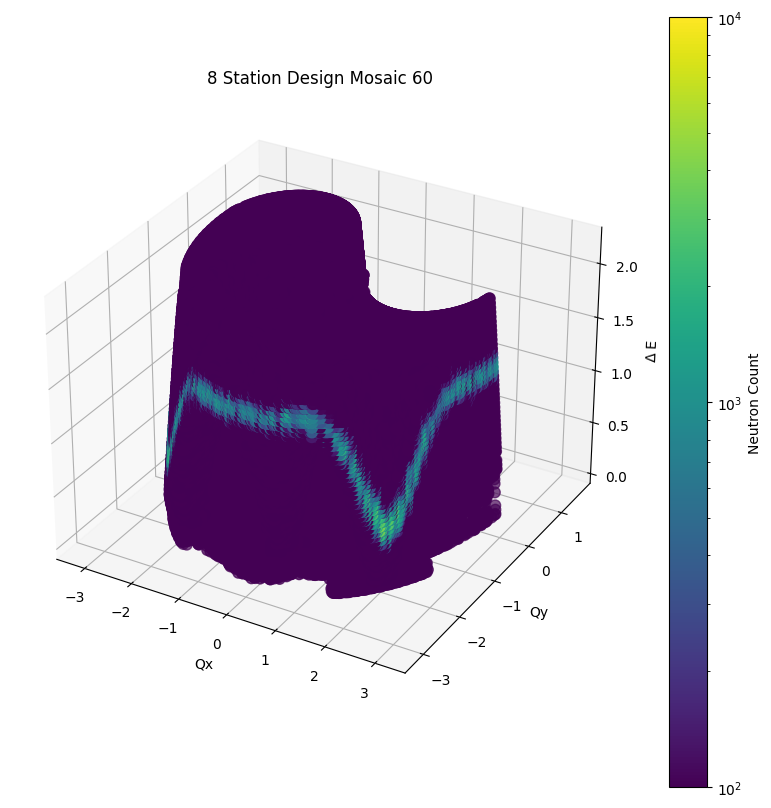

In [232]:

#print(finallist)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
p = ax.scatter(Qxlist, Qylist, newzlist, s=60, c=neutroncountlist, norm = colors.LogNorm(vmin = 100, vmax = 10000))
#p = ax.scatter(Qxlist, Qylist, newzlist, s=60, c=neutroncountlist, vmin = 10, vmax = 500)
tempXList = []
tempYList = []
tempZList = []
tempNeutronList = []
#for tup in tuplist:
#    if tup[2] > 100 and tup[2] < 10000:
        #tempYList += [tup[1]]
        #tempZList += [tup[2]]
#        tempXList += [tup[-2]]
#        tempYList += [tup[-1]]
#        tempZList += [tup[1]]
#        tempNeutronList += [tup[2]]
#p = ax.scatter(tempXList, tempYList, tempZList, s=60, c=tempNeutronList, vmax = 1000)

plt.title("8 Station Design Mosaic 60")
plt.xlabel("Qx")
#plt.ylim(-2,-1)
#plt.zlim(-0.5, 0.5)
plt.ylabel("Qy")
ax.set_zlabel("${\Delta}$ E")
fig.colorbar(p, label = "Neutron Count")
plt.show()
#test = []
#for key in hugeDict[0][0].keys():
#    test.append(key)


In [236]:
#format of tup in tuplist ((Psi, etransferred, ncount, ang, Qx, Qy))
from datetime import date
today = date.today()
def sliceGenerator(var, value, width):
    #first order is Qy
    #Second order is Qx
    #Third order is Energy Transferred
    datalist = []
    #Qxlist22.sort(reverse=True)
    #Etransferredlist.sort(reverse=True)
    bigdict = {}
    if var == "Qy":
        #fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13, 5))
        fig, (ax1) = plt.subplots(1, figsize = (6, 5))
        #for num in range(-320, 320, 5):
        #    num = num / 100
        #    bigdict[num] = {}
        #    for e in Etransferredlist:
        #        bigdict[num][e] = 0
        #for key in bigdict.keys():
        #    for tup in tuplist:
        #        if tup[-1] <= value+width and tup[-1] >= value-width:
        #            if tup[-2] > key - 0.025 and tup[-2] < key + 0.025:
                    # print(tup)
                    # print(bigdict[key][tup[1]])
        #                bigdict[key][tup[1]] += tup[2]
        #xlist = []
        #for key in bigdict.keys():
        #    xlist.append(key)
        #xlist.sort()

        #finallist = []
        #for thing in Etransferredlist:
        #    thislist = []
        #    for num in xlist:
        #        thislist.append(bigdict[num][thing])
        #    finallist.append(thislist)
        #xmin = min(xlist)
        #xmax = max(xlist)
        #ymin = min(Etransferredlist)
        #ymax = max(Etransferredlist)
        #print(ymax)
        """
        for e in Etransferredlist:
            thislist = []
            for qx in Qxlist22:
                thislist.append(hugeDict[qx][value][e])
            datalist.append(thislist)
        """


        xboys = []
        yboys = []
        zboys = []
        
        x2dHist = []
        y2dHist = []
        for tup in tuplist:
            if tup[-1] <= value+width and tup[-1] >= value-width:
                xboys += [tup[-2]]
                yboys += [tup[1]]
                if tup[2] <0 :
                    print("HIHIHIHIHIH")
                zboys += [tup[2]]
                
                tempx2dHist= [tup[-2]] * round(tup[2])
                x2dHist += tempx2dHist
                y2dHist += [tup[1]] * round(tup[2])
        #plt.scatter(xboys,yboys, s=60, c=zboys)

        #plt.show()
        a = ax1.scatter(xboys, yboys, s=8, c=zboys, vmin = 100, vmax = 10000)
        #a = ax1.scatter(xboys, yboys, s=11, c = zboys, norm =colors.LogNorm(vmin = 1, vmax = 100))
        #a = ax1.scatter(xboys, yboys, s = 20, c = zboys, vmin = 100, vmax = 800)
        plt.ylabel("${\Delta}$E (meV)")
        plt.xlabel(r"$Q_x$ $(\AA^{-1})$")
        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5,0.5)
        
        ax1.set_xlim(-2.6, 2.6)
        #ax1.set_xlim(-0.2, 0.45)
        ax1.set_ylim(0, 2.2)
        #ax1.set_ylim(1.25, 1.75)
        plt.colorbar(a, label = "Intensity (a.u.)")
        plt.title(r"Phonon Dispersion ($Q_x$,  $Q_y$ = " + str(value) + " $\pm $ " + str(width) + " $\AA^{-1}$)")
        path = f"D:/Users/Adit/Figures/2024 Updated Figures/Detector_Different_2theta/5 Station 2 deg Mosaic Toy Model_{today}.pdf"
        if os.path.isfile(path):
            print("File exists! Pick a new name")
        else:
            plt.savefig(path, format="pdf")
            #pass
        plt.show()
        #ax1.set_ylabel("${\Delta}$E")
        #ax1.set_xlabel("Qx " + r'$\AA$')
        #ax1.set_title("Data Points")
        #ax1.set_xlim(-1.8, 1.)
        #plt.colorbar(a, label="Neutron Count", ax=ax1)
        #mylist = []
        #print(datalist)
    
        #i = len(finallist) - 1

        #while i > -1:
        #    mylist.append(finallist[i])
        #    i -= 1
        
        #x = np.linspace(xmin, xmax, len(thislist))
        #y = np.linspace(ymin, ymax, len(Etransferredlist))
        #mylist = np.array(mylist)
        #finallist = np.array(finallist).T
        #f = interp.interp2d(x, y, mylist)
        #xnew = np.arange(xmin, xmax, 1e-2)
        #ynew = np.arange(ymin, ymax, 1e-2)
        #znew = f(xnew, ynew)
        #plt.xlabel("h")
        # ax.set_title("Slice of Qx = " + str(value))
        #b = ax2.pcolormesh(xnew, ynew, znew, norm = colors.LogNorm(vmin = 0.01, vmax = 500))
        #b = ax2.pcolormesh(xnew, ynew, znew)
        
        
        #b = ax2.hist2d(x2dHist, y2dHist, bins = 70)
        #ax2.set_title("Interpolated Data")
        #ax2.set_ylabel("${\Delta}$E")
        #fig.suptitle(r"Slice of (h,  " + str(value) + ", 0) 5 Station Mosaic 120")
        #plt.colorbar(b, label="Neutron Count")
        #plt.show()
        
        
        """
        b = ax2.imshow(znew, extent=[xmin, xmax, ymin, ymax], aspect='auto', interpolation='bilinear')
        ax2.set_title("Interpolated Data")
        ax2.set_ylabel("${\Delta}$E")
        fig.suptitle("Slice of (h,  " + str(value) + ", 0) 8 Station Toy Model Ei-5.1 and Ei-5.2")
        plt.colorbar(b, label="Neutron Count")
        plt.show()
        """
        
        #plt.xlabel("Qx")
        #plt.ylabel("Etransferred")
        #plt.title("Slice of Qy = " + str(value))
        #plt.imshow(znew, extent = [xmin,xmax,ymin,ymax], aspect = 'auto', interpolation='bilinear')
        #plt.colorbar(label="Neutron Count")
        #plt.show()
        # format of tup in tuplist ((Q, etransferred, ncount, ang, Qx, Qy))
    if var == "Qx":
        #fig, ax = plt.subplots()
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

        for num in range(-320, 320, 20):
            num = num / 100
            bigdict[num] = {}
            for e in Etransferredlist:
                bigdict[num][e] = 0
        for key in bigdict.keys():
            for tup in tuplist:
                if tup[-2] <= value+.1 and tup[-2] >= value-0.1:
                    if tup[-1] > key - 0.1 and tup[-1] < key + 0.1:
                        # print(tup)
                        # print(bigdict[key][tup[1]])
                        bigdict[key][tup[1]] += tup[2]
        xlist = []
        for key in bigdict.keys():
            xlist.append(key)
        xlist.sort()
        finallist = []
        for thing in Etransferredlist:
            thislist = []
            for num in xlist:
                thislist.append(bigdict[num][thing])
            finallist.append(thislist)
        xmin = min(xlist)
        xmax = max(xlist)
        ymin = min(Etransferredlist)
        ymax = max(Etransferredlist)
        """
        for e in Etransferredlist:
            thislist = []
            for qx in Qxlist22:
                thislist.append(hugeDict[qx][value][e])
            datalist.append(thislist)
        """

        xboys = []
        yboys = []
        zboys = []
        for tup in tuplist:
            if tup[-2] <= value+.05 and tup[-2] >= value-0.05:
                xboys += [tup[-1]]
                yboys += [tup[1]]
                zboys += [tup[2]]
        a = ax1.scatter(xboys, yboys, s=60, c=zboys)
        ax1.set_ylabel("${\Delta}$E")
        ax1.set_xlabel("Qy " + str(value))
        ax1.set_title("Data Points")
        plt.colorbar(a, label = "Neutron Count", ax = ax1)
        #plt.show()
        mylist = []
        # print(datalist)
        """
        i = len(datalist) - 1
        print(datalist)
        while i > -1:
            mylist.append(datalist[i])
            i -= 1
        """
        x = np.linspace(xmin, xmax, len(thislist))
        y = np.linspace(ymin, ymax, len(Etransferredlist))
        f = interp.interp2d(x, y, finallist)
        xnew = np.arange(xmin, xmax, 1e-2)
        ynew = np.arange(ymin, ymax, 1e-2)
        znew = f(xnew, ynew)
        plt.xlabel("Qy " + r'$\AA$')
        #ax.set_title("Slice of Qx = " + str(value))
        b = ax2.imshow(znew, extent=[xmin, xmax, ymin, ymax], aspect='auto', interpolation='bilinear')
        ax2.set_title("Interpolated Data")
        ax2.set_ylabel("${\Delta}$E")
        fig.suptitle("Slice of Qx = " + str(value) + " $\pm$ 0.05 " + r'$\AA$ with New Analysis Method' )
        plt.colorbar(b, label="Neutron Count")
        plt.show()
    # format of tup in tuplist ((Psi, etransferred, ncount, ang, Qx, Qy))
    if var == "Etransferred":
        xmin = min(Qxlist)
        xmax = max(Qxlist)
        ymin = min(Qylist)
        ymax = max(Qylist)

        for key in hugeDict.keys():
            thislist = []
            for key2 in hugeDict[key].keys():
                for key3 in hugeDict[key][key2].keys():
                    if key3 <= value +0.05 and key3 >= value - 0.05:
                        thislist.append(hugeDict[key][key2][key3])
            datalist.append(thislist)
        for num in range(-300, 300, 10):
            num = num / 100
            bigdict[num] = {}
            for boyo in range(-300, 300, 10):
                boyo = boyo / 100
                bigdict[num][boyo] = 0
        #boyo = y
        #num =x
        for tup in tuplist:
            if tup[1] <= value+0.05 and tup[1]>= value -0.05:
                for akey in bigdict.keys():
                    if tup[-2] >= akey -0.05 and tup[-2] <= akey +0.05:
                        for thiskey in bigdict[akey].keys():
                            if tup[-1] >= thiskey -0.05 and tup[-1] <= thiskey +0.05:
                                bigdict[akey][thiskey] += tup[2]
        """
        for akey in bigdict.keys():
            for thiskey in bigdict[akey].keys():
                if bigdict[akey][thiskey] == 0:
                    bigdict[akey][thiskey] = np.nan
        """
        #print(bigdict)
        xlist = []
        for key in bigdict.keys():
            xlist.append(key)
        xlist.sort()
        ylist = []
        for key in bigdict[0].keys():
            ylist.append(key)
        ylist.sort()
        finallist = []
        #print(bigdict.keys())
        for thing in ylist:
            thislist = []
            for num in xlist:
                thislist.append(bigdict[num][thing])
            finallist.append(thislist)
        #print(finallist)
        #print("this my finallist")
        xmin = min(xlist)
        xmax = max(xlist)
        ymin = min(ylist)
        ymax = max(ylist)

        """
        for num in range(15, 320, 10):
            num = num / 100
            bigdict[num] = {}
            for soup in range(15,320, 10):
                bigdict[num][soup] = 0
        for key in bigdict.keys():
            for tup in tuplist:
                if tup[-2] <= value+.05 and tup[-2] >= value-0.05:
                    if tup[-1] > key - 0.05 and tup[-1] < key + 0.05:
                        # print(tup)
                        # print(bigdict[key][tup[1]])
                        bigdict[key][tup[1]] += tup[2]
        """
        xboys = []
        yboys = []
        zboys = []
        magQlist =[]
        # format of tup in tuplist ((Q, etransferred, ncount, ang, Qx, Qy))
        mymin = 0
        mymax = 0
        thisxmin = 0
        thisxmax = 0
        thisymin = 0
        thisymax = 0
        for tup in tuplist:
            if tup[2] > mymax:
                mymax = tup[2]
            if tup[-2] < thisxmin:
                thisxmin = tup[-2]
            if tup[-2] > thisxmax:
                thisxmax = tup[-2]
            if tup[-1] < thisymin:
                thisymin = tup[-1]
            if tup[-1] > thisymax:
                thisymax = tup[-1]
            if tup[1] <= value + 0.05 and tup[1] >= value - 0.05:
                xboys += [tup[-2]]
                yboys += [tup[-1]]
                zboys += [tup[2]]
                #zboys += [tup[0]]
                magQ = np.sqrt(tup[-1]**2 + tup[-2]**2)
                magQlist.append(magQ)
        #print(mymax)

        a = plt.scatter(xboys, yboys, s=7, c=zboys, vmin=0, vmax=mymax/100)
        #axes = a.add_axes([.1, .1, .8, .8])
        #a.set_xlim([-3.1,3.1])
        plt.xlim(thisxmin, thisxmax)
        plt.ylim(thisymin, thisymax)
        plt.xlabel("h")
        plt.ylabel("k")
        plt.colorbar(label="Neutron Count")
        #norm = colors.Normalize(vmin=0, vmax=mymax)
        plt.title("Phonon (h, k, 0) Slice of ${\Delta}$E = " + str(value) + " $\pm$ 0.05 " + ' 5 Station Mosaic 30')
        plt.show()
        x = np.linspace(xmin, xmax, len(thislist))
        y = np.linspace(ymin, ymax, len(finallist))
        f = interp.interp2d(x, y, finallist)
        f = interp.interp2d(x, y, finallist)
        xnew = np.arange(xmin, xmax, 1e-2)
        ynew = np.arange(ymin, ymax, 1e-2)
        znew = f(xnew, ynew)
        #print(magQlist)

        mylist = []
        i = len(finallist) - 1
        while i > -1:
            mylist.append(finallist[i])
            i -= 1

        plt.xlabel("h")
        plt.ylabel("k")
        plt.title("Slice of ${\Delta}$E = " + str(value) + "8 Station Mosaic 120")
        plt.imshow(mylist, extent=[xmin, xmax, ymin, ymax], aspect='auto', interpolation='bilinear')
        plt.colorbar(label="Neutron Count")
        plt.show()

In [237]:
#format of tup in tuplist ((Q, etransferred, ncount, ang, Qx, Qy))
from lmfit.models import *

def Gauss(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i + 1]
        wid = params[i + 2]
        y = y + amp * np.exp(-((x - ctr) / wid) ** 2)
    return y

def sliceGenerator1D(parameter, qxVal, qyVal, eTransferredVal):
    xAxisScatter = []
    yAxisScatter = []
    pairs = []      
    bigdict = {}
    if parameter == "Qx":
        for num in range(0, 201, 10):
            num = num / 100
            bigdict[num] = 0
        #for tup in tuplist:
        #    if tup[-1] <= (qyVal + 0.025) and tup [-1] >= (qyVal - 0.025):
        #        if tup[1] <= (eTransferredVal + 0.05) and tup[1] >= (eTransferredVal -0.05):
        #           xAxisScatter.append(tup[-2])
        #           yAxisScatter.append(tup[2])
        #           pairs.append((tup[-2], tup[2]))
        for key in bigdict:
            for tup in tuplist:
                    if tup[1] <= eTransferredVal + 0.05 and tup[1] >= eTransferredVal-0.05:
                        if tup[-1] > qyVal - 0.1 and tup[-1] < qyVal + 0.1:
                        # print(tup)
                        # print(bigdict[key][tup[1]])
                            if tup[-2] <= key +0.05 and tup[-2] >= key - 0.05:
                                bigdict[key] += tup[2]

        xAxisScatter = []
        yAxisScatter = []                        
        
        for key in bigdict:
            xAxisScatter.append(key)
            yAxisScatter.append(bigdict[key])
        
        xAxisScatter = np.array(xAxisScatter)
        yAxisScatter = np.array(yAxisScatter)
        plt.xlabel("$Q_x$")
        plt.ylabel("Intensity (a.u.)")
        plt.scatter(xAxisScatter, yAxisScatter, marker = "x")
        #plt.show()
        pairs.sort()

    

        i_pk, _ = scipy.signal.find_peaks(yAxisScatter, prominence=4, distance=4)
        
        """
        for i in range(len(i_pk)):
            if i != (len(i_pk) -1):
                if i_pk[i+1] - i_pk[i] <= 2:
                    fakePeakIndices.append(i)
        print(i_pk)
        print(fakePeakIndices)
        i_pk = np.delete(i_pk, fakePeakIndices)
        """
        #print(i_pk)
        test = i_pk[1]
        #print(xAxisScatter[test])
        gaussMod = GaussianModel()
        pars = gaussMod.guess(data=yAxisScatter, x= xAxisScatter)
        #print(pars)
        modList = []
        for i in range(len(i_pk)):
            val = i_pk[i]
            gauss = GaussianModel(prefix='g' + str(i+1) + '_')
            pars.update(gauss.make_params())
            pars['g' + str(i+1) + '_center'].set(xAxisScatter[val])
            pars['g' + str(i+1) + '_sigma'].set(0.1)
            pars['g' + str(i+1) + '_amplitude'].set(yAxisScatter[val])
            #pars['g' + str(i+1) + '_expon'].set(1.5)
            modList.append(gauss)
        modArray = np.array(modList)
        mod = np.sum(modArray)
        init = mod.eval(pars, x=xAxisScatter)
        #plt.plot(myBins, init)
        out = mod.fit(yAxisScatter, pars, x=xAxisScatter)
        #print(out.fit_report())
        plt.plot(xAxisScatter, out.best_fit)
        #for thing in pairs:
         #   xAxisScatter.append(thing[0])
         #   yAxisScatter.append(thing[1])
        
        xAxisScatter = np.array(xAxisScatter)
        yAxisScatter = np.array(yAxisScatter)
        #plt.plot(xAxisScatter, yAxisScatter)
        plt.xlabel("h")
        plt.ylabel("Intensity (a.u.)")
        plt.title("8 Station Full MANTA Mosaic 60 $\Delta E = $" +str(eTransferredVal) + " $\pm 0.05$ meV, k $ = $ " + str(qyVal) + ' $\pm 0.1$')
        plt.title
        plt.show()
        return out.best_values

      
    if parameter == "Qy":
        print("Not Ready Yet")
    if parameter == "Etransferred":
        for num in range(2, 210, 4):
            num = num / 100
            bigdict[num] = 0
    # format of tup in tuplist ((Q, etransferred, ncount, ang, Qx, Qy))
        for key in bigdict.keys():
            for tup in tuplist:
                if tup[-1] <= qyVal+.1 and tup[-1] >= qyVal-0.1:
                    if tup[-2] > qxVal - 0.05 and tup[-2] < qxVal + 0.05:
                    # print(tup)
                    # print(bigdict[key][tup[1]])
                        if tup[1] <= key +0.02 and tup[1] >= key - 0.02:
                            bigdict[key] += tup[2]
        for tup in tuplist:
            if tup[-1] <= (qyVal + 0.1) and tup[-1] >= (qyVal - 0.1):
                if tup[-2] <= (qxVal + 0.05) and tup[-2] >= (qxVal - 0.05):
                   xAxisScatter.append(tup[1])
                   yAxisScatter.append(tup[2])
                   pairs.append((tup[1], tup[2]))
        plt.xlabel("$\Delta E$ (meV)")
        plt.ylabel("Intensity (a.u.)")

        #plt.show()
        pairs.sort()
        xAxisScatter = []
        yAxisScatter = []
        for key in bigdict:
            xAxisScatter.append(key)
            yAxisScatter.append(bigdict[key])
        xAxisScatter = np.array(xAxisScatter)
        yAxisScatter = np.array(yAxisScatter)
        plt.scatter(xAxisScatter, yAxisScatter, marker = "x")
        gaussMod = GaussianModel()
        pars = gaussMod.guess(data=yAxisScatter, x= xAxisScatter)
        #mod = 
        init = gaussMod.eval(pars, x=xAxisScatter)
        #plt.plot(myBins, init)
        out = gaussMod.fit(yAxisScatter, pars, x=xAxisScatter)
        x = np.linspace(0, 2, 300)
        amp, cent, sigma = out.best_values['amplitude'], out.best_values['center'], out.best_values['sigma']
    
        y = amp/(np.sqrt(2*np.pi)*sigma) * np.exp(-((x-cent)**2)/(2* (sigma**2)))
        #plt.plot(xAxisScatter, out.best_fit)
        plt.plot(x, y)
        #plt.plot(xAxisScatter, yAxisScatter)
        plt.xlim(0., 2.0)
        print(out.best_values)
        plt.title("8 Station Toy Model Mosaic 60 h = " + str(qxVal) + " $\pm 0.1$,  k= " + str(qyVal) + " $\pm$ $ 0.1$ Cut ")
        plt.show()
        return out.best_values

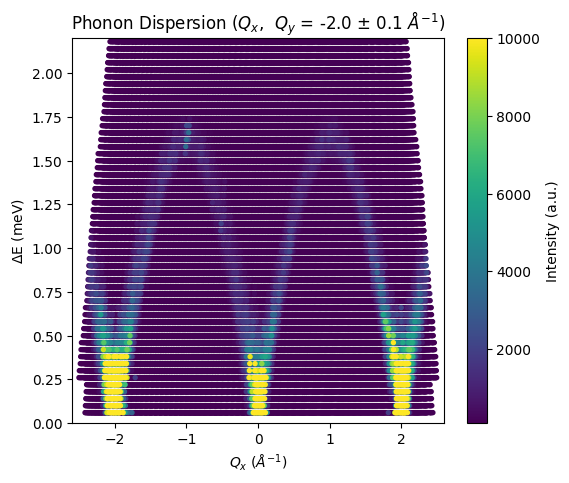

In [238]:
#sliceGenerator("Etransferred", 1.89)
#sliceGenerator("Etransferred", 1.72)
#sliceGenerator("Etransferred", 1.52)

#sliceGenerator1D("Qx", "N/A", -2, 1.3)

#sliceGenerator1D("Etransferred", 0.8, -2, "N/A")


sliceGenerator("Qy", -2., 0.1)

#sliceGenerator("Etransferred", 0.5, 0.1)
#sliceGenerator("Etransferred", 1.05)
#sliceGenerator("Etransferred", 0.77)
#sliceGenerator("Etransferred", 0.46)
#sliceGenerator("Etransferred", 0.09)

{'amplitude': 62261.78131399777, 'center': 0.48790468926388314, 'sigma': 0.14401557208713944}


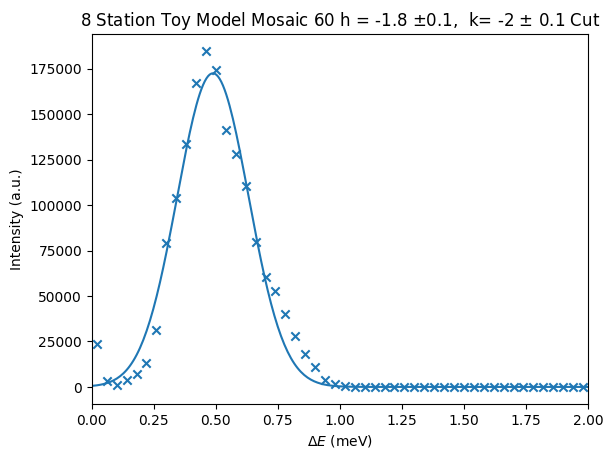

{'amplitude': 33959.34172520655, 'center': 0.7288099492455494, 'sigma': 0.14905709782888454}


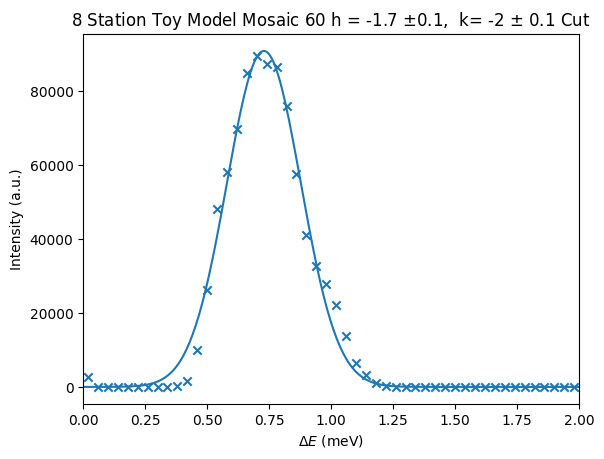

{'amplitude': 22101.441201261005, 'center': 0.961300535757318, 'sigma': 0.13374696142608866}


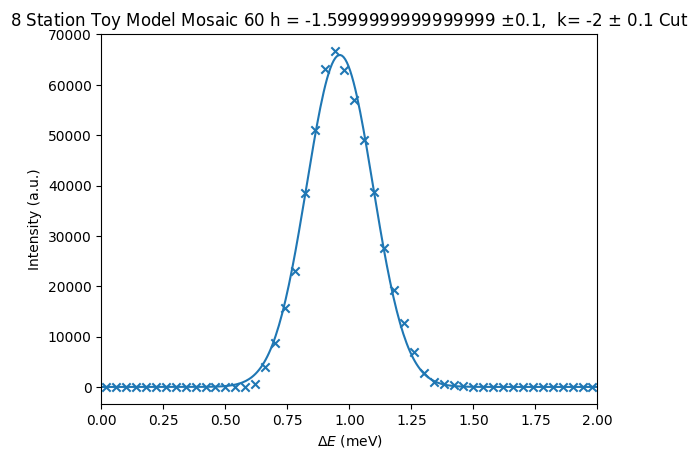

{'amplitude': 16743.85944330123, 'center': 1.1576728002481396, 'sigma': 0.12792498635915805}


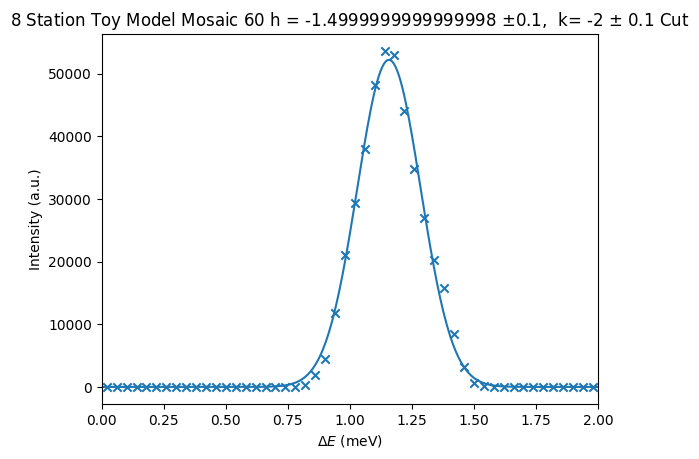

{'amplitude': 17383.085689128435, 'center': 1.3241780098351126, 'sigma': 0.10852459723178809}


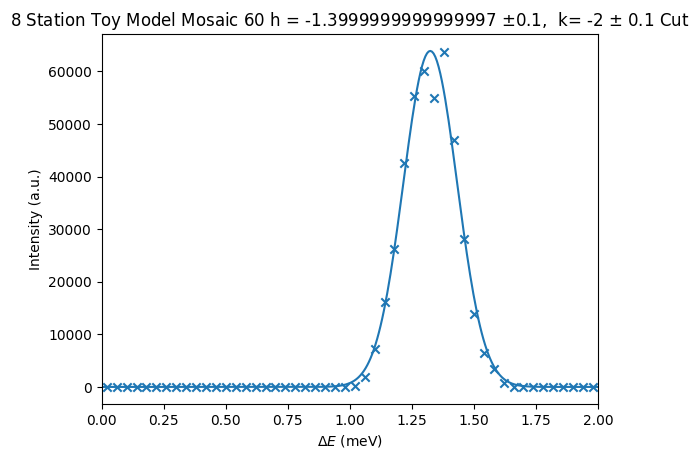

{'amplitude': 17559.24341275698, 'center': 1.4476977095597556, 'sigma': 0.08641325675788414}


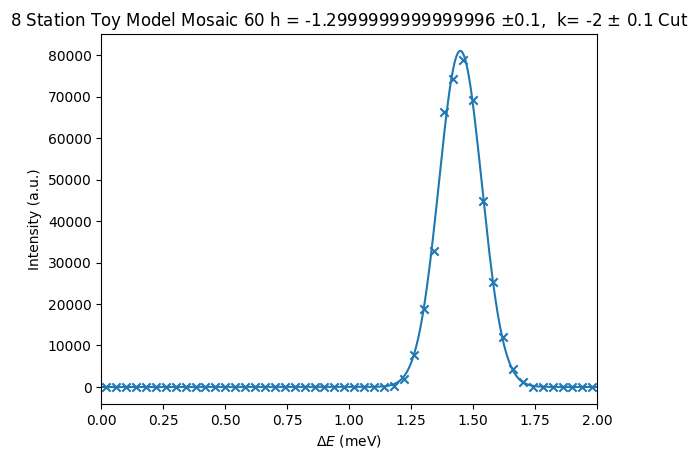

{'amplitude': 17860.69149633214, 'center': 1.52841457800872, 'sigma': 0.07663493061928994}


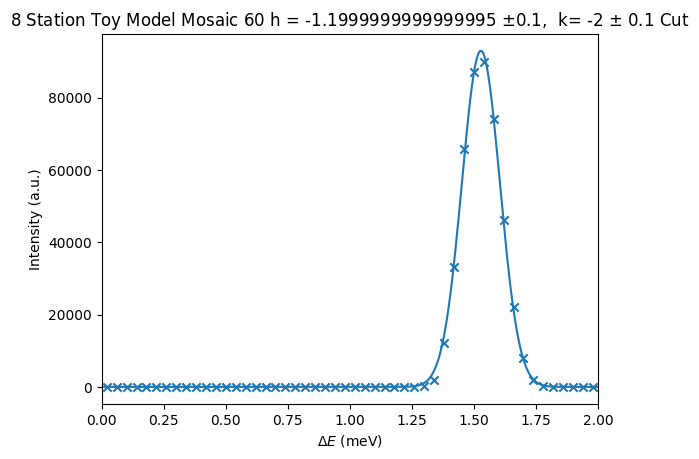

{'amplitude': 16196.073217887833, 'center': 1.5910992252842282, 'sigma': 0.0692760547676956}


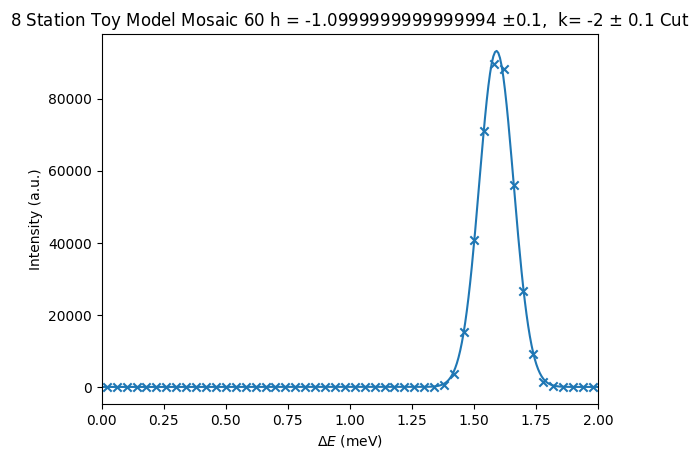

{'amplitude': 15644.879499084935, 'center': 1.6158659370132944, 'sigma': 0.06303299824435848}


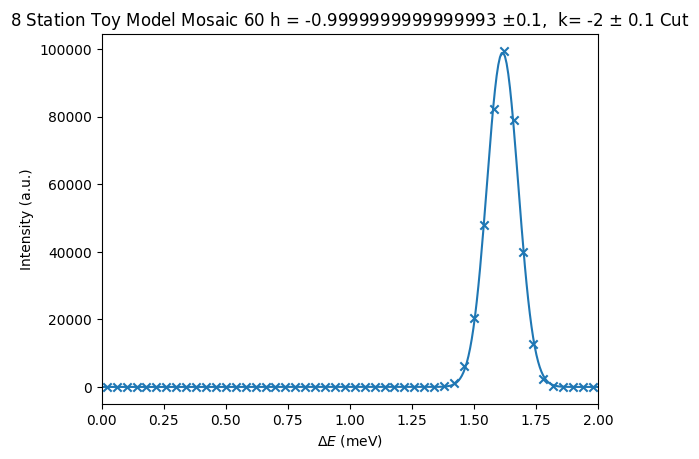

{'amplitude': 15424.408426049149, 'center': 1.5948374161734997, 'sigma': 0.07093995379705342}


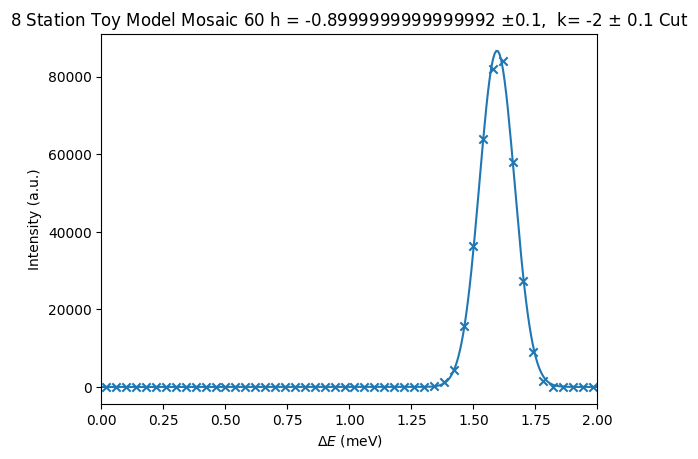

{'amplitude': 16454.40680644319, 'center': 1.534205470820136, 'sigma': 0.08137327913358039}


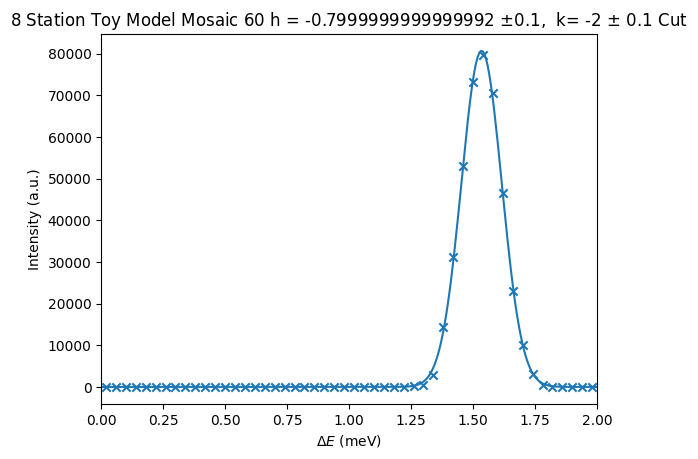

{'amplitude': 15786.47655101787, 'center': 1.4356620920092944, 'sigma': 0.08691843958920953}


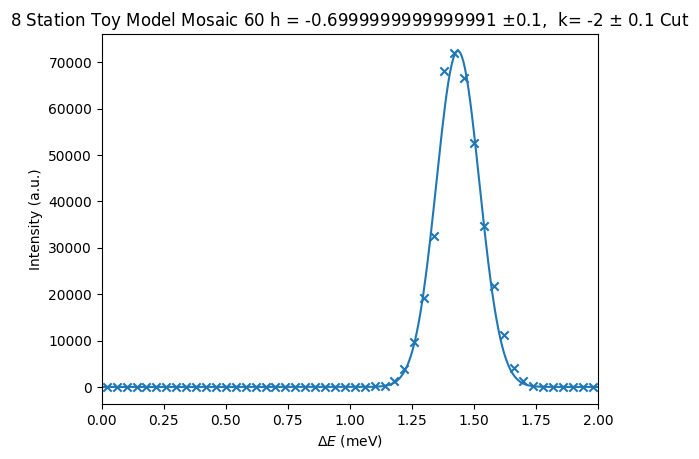

{'amplitude': 15904.747056295788, 'center': 1.333429278506587, 'sigma': 0.11901288678026534}


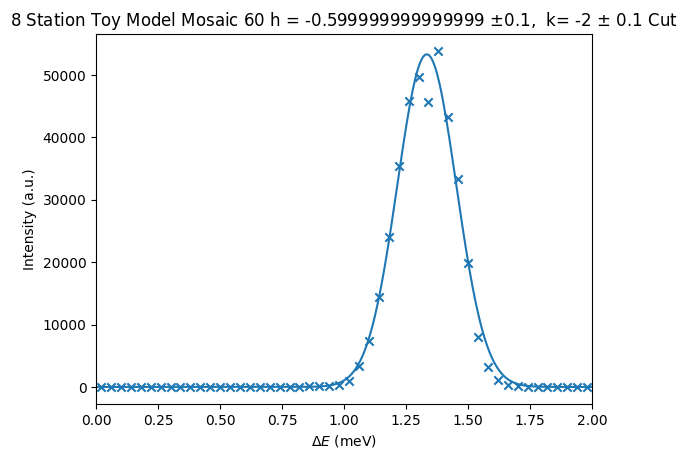

{'amplitude': 15311.620508258498, 'center': 1.1618905011221092, 'sigma': 0.12012762020285805}


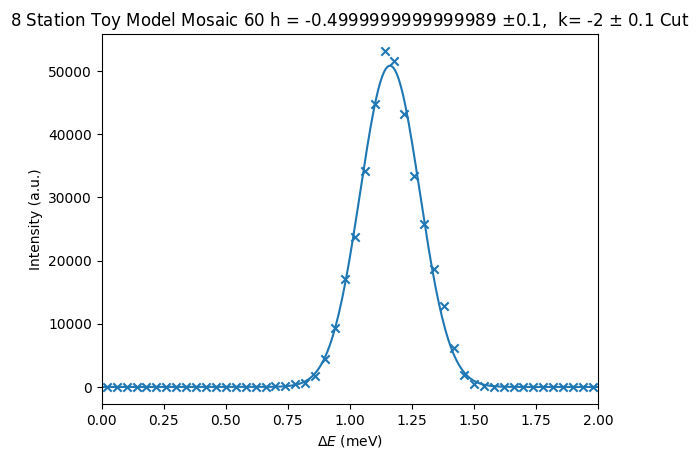

{'amplitude': 16769.722406466146, 'center': 0.9603183480540907, 'sigma': 0.14504102887828063}


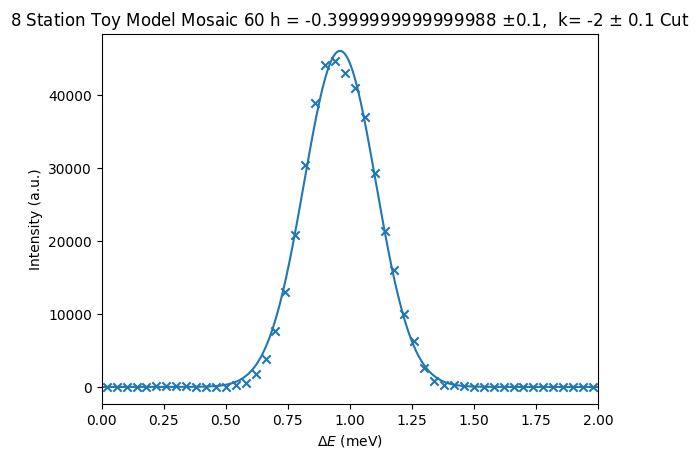

{'amplitude': 24839.28097162242, 'center': 0.7498424393800027, 'sigma': 0.1471048777722308}


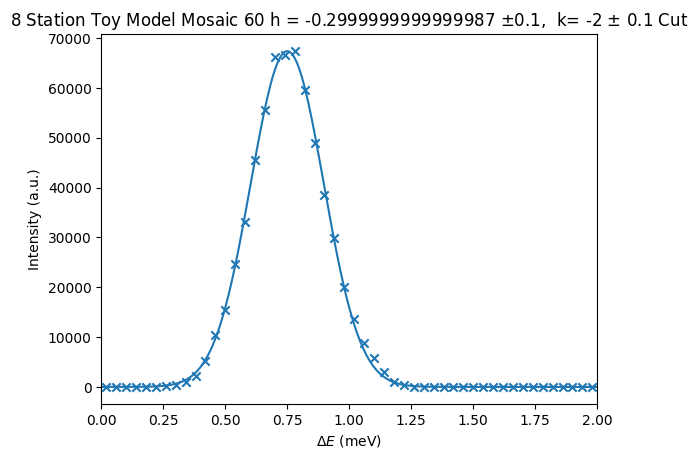

{'amplitude': 40243.093409560635, 'center': 0.5350412480989836, 'sigma': 0.15808445973922436}


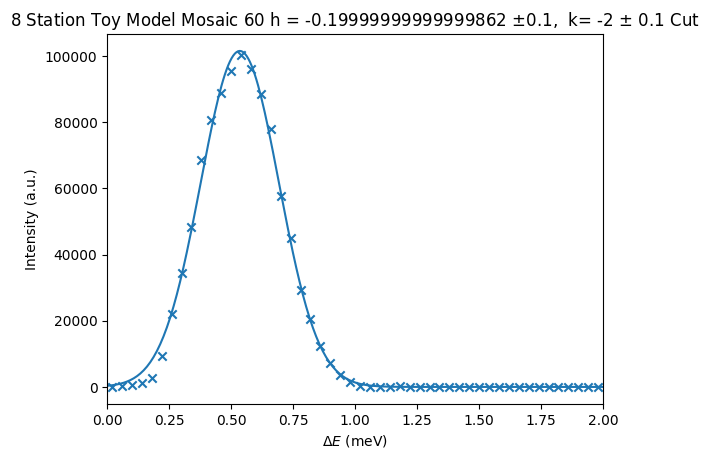

{'amplitude': 109656.03160221221, 'center': 0.2726054763319364, 'sigma': 0.174350625635608}


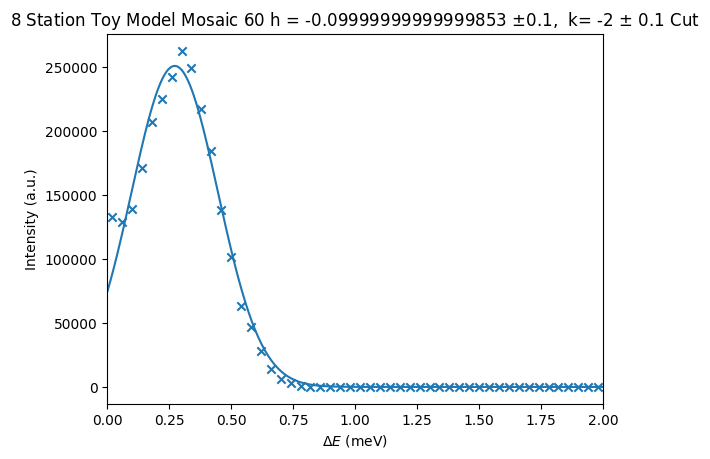

{'amplitude': 943726.1176968272, 'center': -0.11323277067450764, 'sigma': 0.2592332060340883}


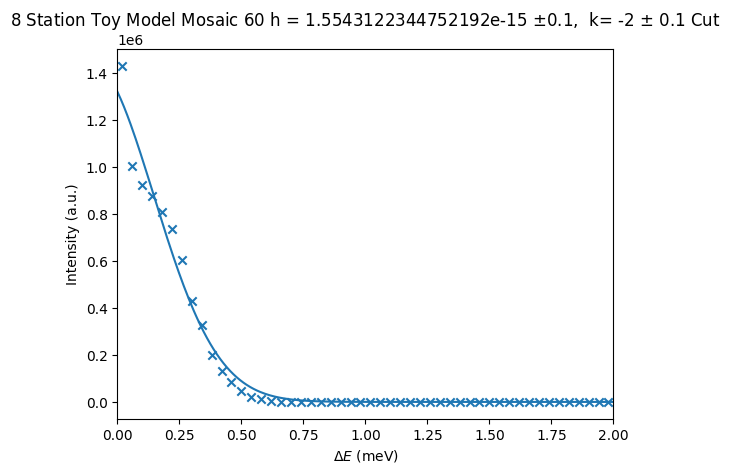

{'amplitude': 147991.61011012507, 'center': 0.25099971625516765, 'sigma': 0.14817369669132163}


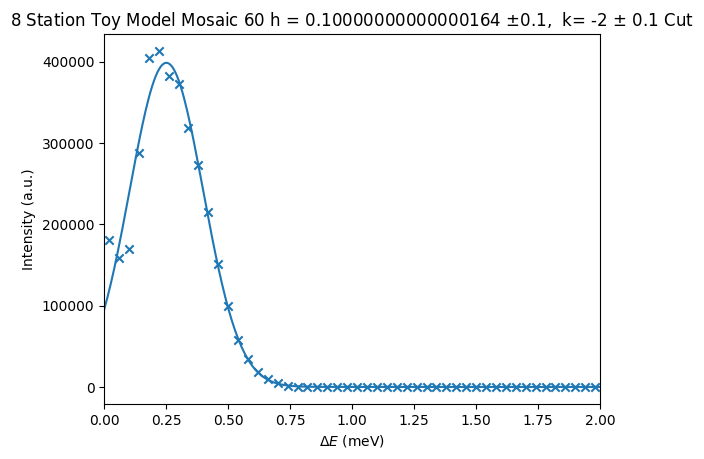

{'amplitude': 45890.03891436696, 'center': 0.5268099538302415, 'sigma': 0.13581705588263016}


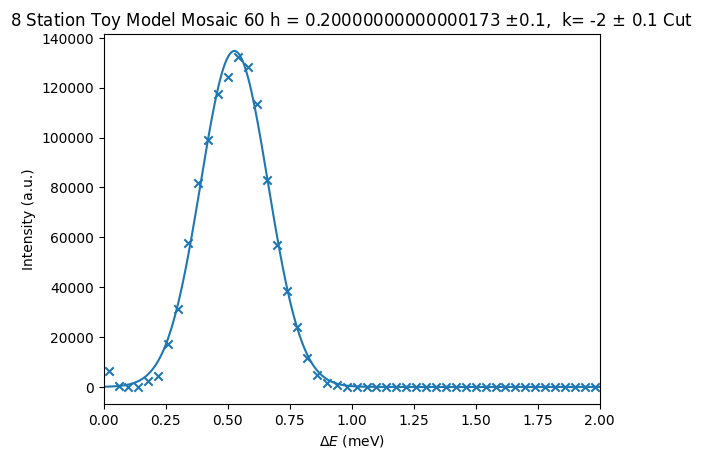

{'amplitude': 24100.1127593607, 'center': 0.7439585738886096, 'sigma': 0.11462312719328738}


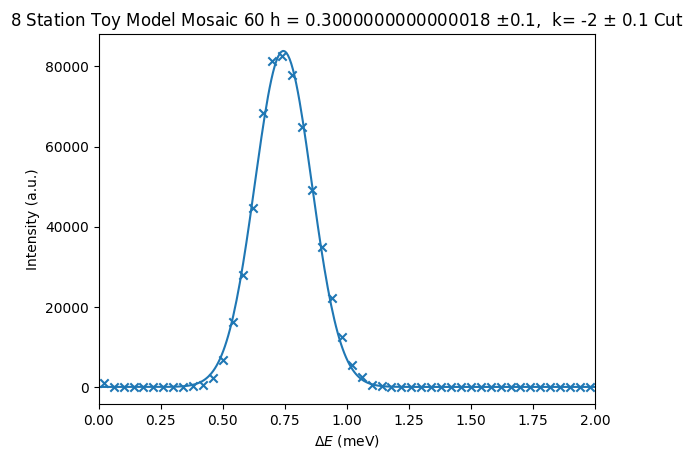

{'amplitude': 17021.270856605952, 'center': 0.9682563719901575, 'sigma': 0.10812998537526397}


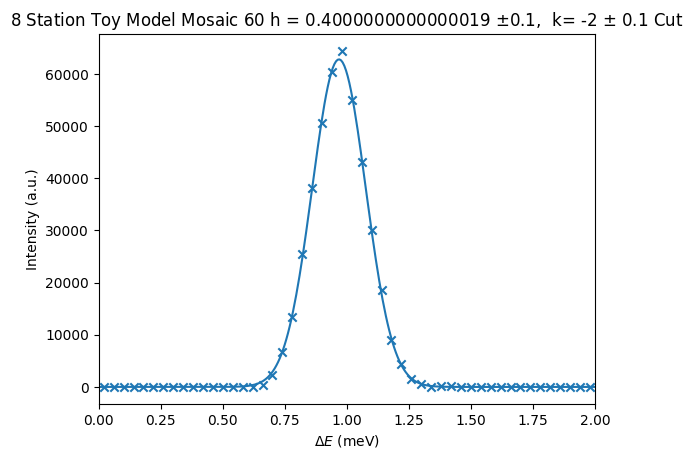

{'amplitude': 14876.35808244816, 'center': 1.1594810324019775, 'sigma': 0.09415196377166457}


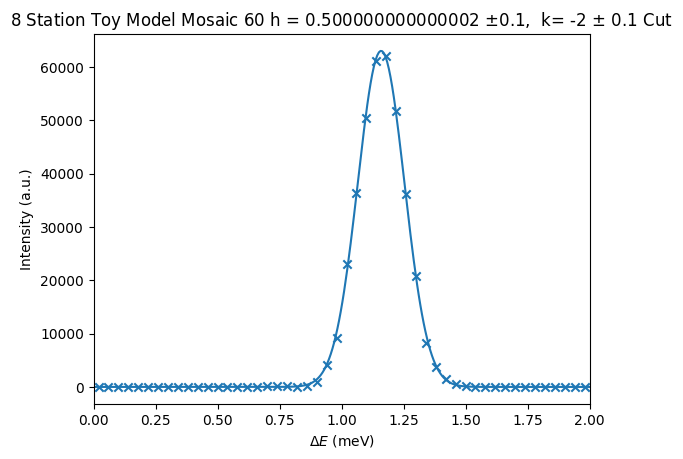

{'amplitude': 15361.14209859185, 'center': 1.3215130421147987, 'sigma': 0.0910886264241324}


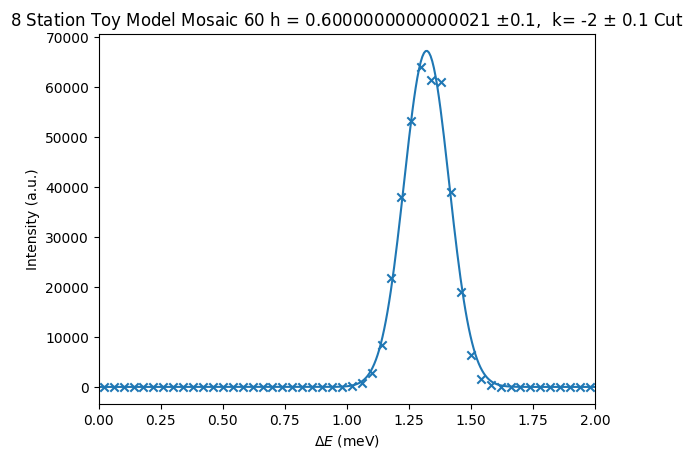

{'amplitude': 16894.42537546884, 'center': 1.445530639933315, 'sigma': 0.07496409643274138}


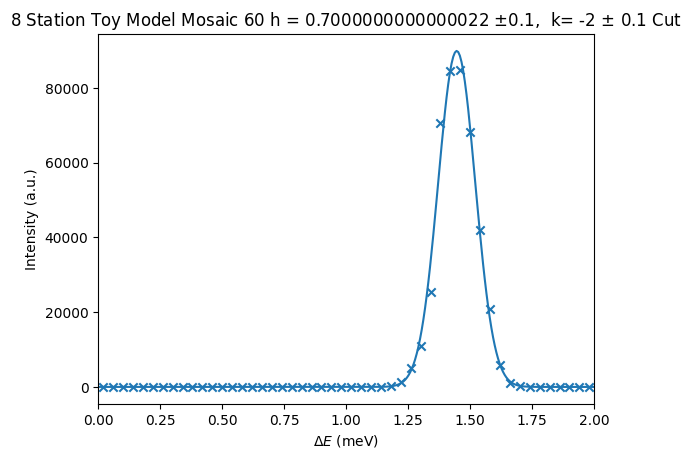

{'amplitude': 17603.868975153757, 'center': 1.5325894624584113, 'sigma': 0.07049630104507276}


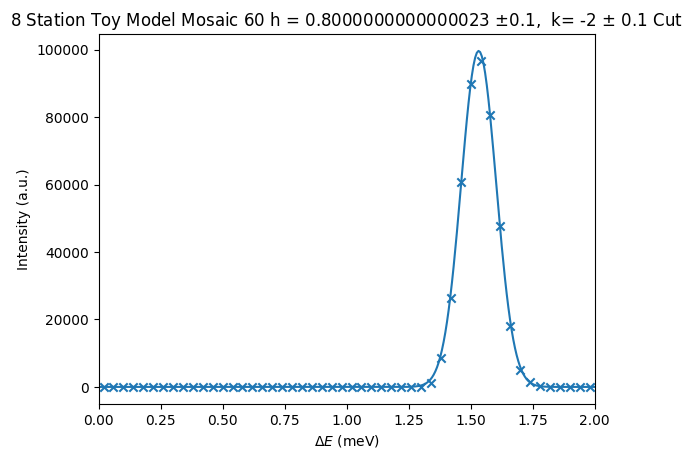

{'amplitude': 15939.600665149455, 'center': 1.5952688411203264, 'sigma': 0.06503312287280028}


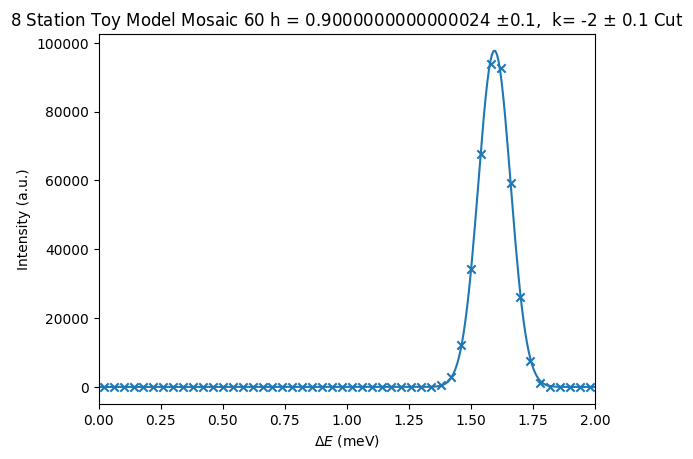

{'amplitude': 15580.390137672752, 'center': 1.619173806051852, 'sigma': 0.06579049033371565}


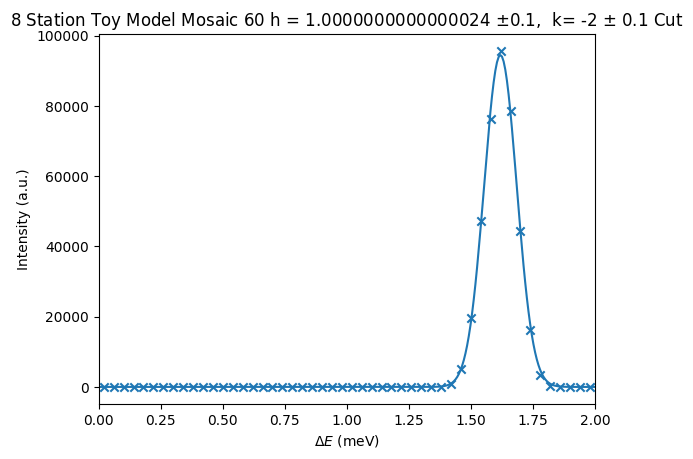

{'amplitude': 15410.27935115717, 'center': 1.605810833642197, 'sigma': 0.07180173562478087}


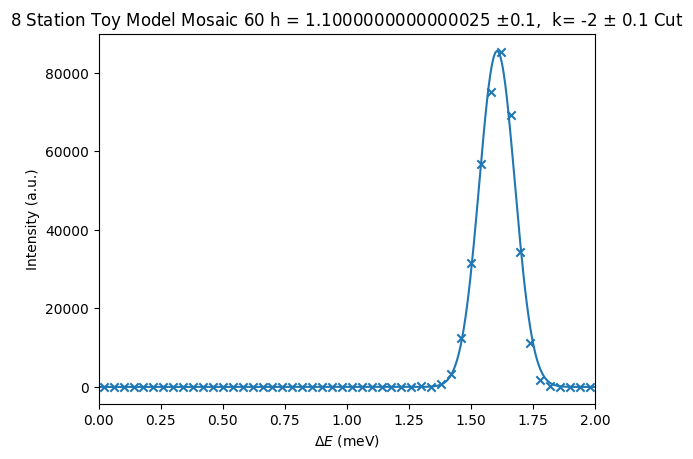

{'amplitude': 17019.457970080784, 'center': 1.5411824856425056, 'sigma': 0.07664310259767082}


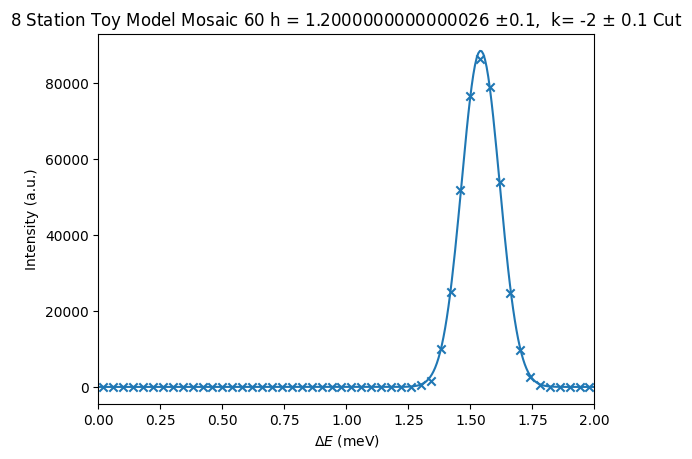

{'amplitude': 18383.829562817067, 'center': 1.4554537485906243, 'sigma': 0.08098090808085678}


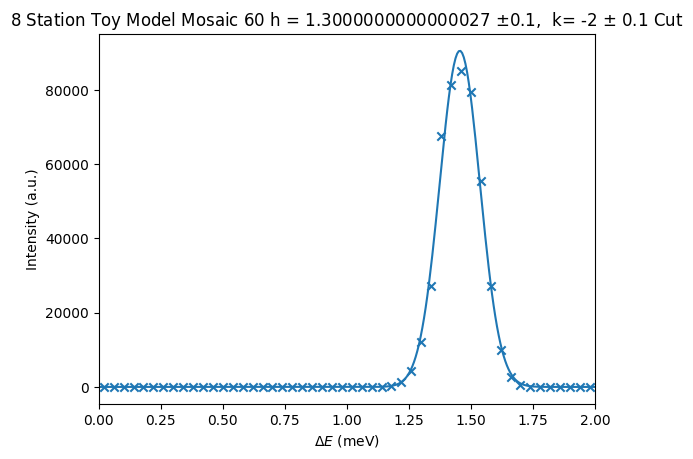

{'amplitude': 16932.73504712701, 'center': 1.3331253179976743, 'sigma': 0.09787771124854627}


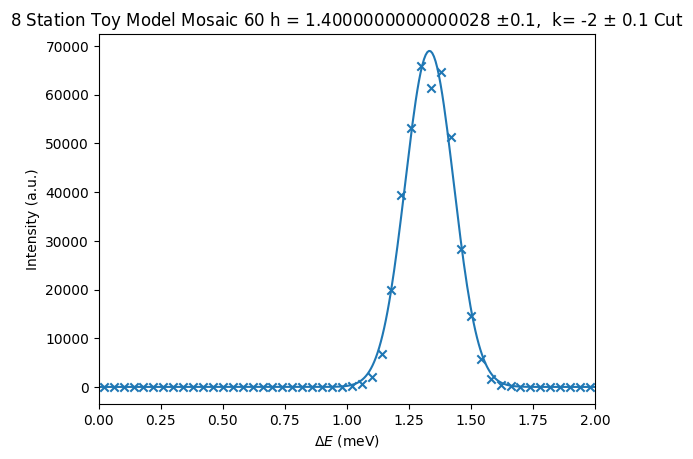

{'amplitude': 16558.779103559333, 'center': 1.1776548021234636, 'sigma': 0.09292990047019889}


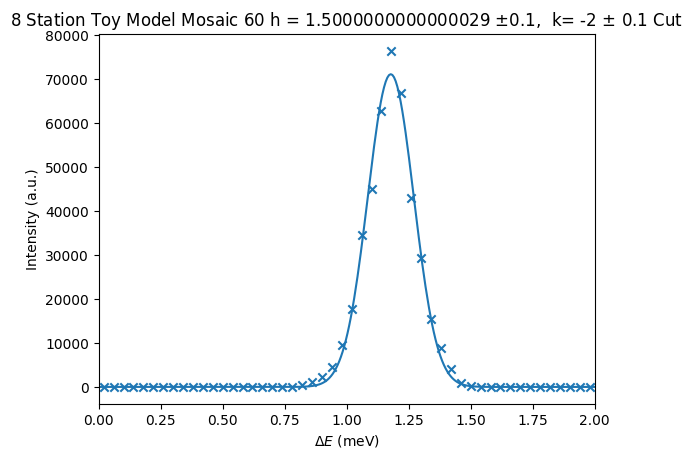

{'amplitude': 21472.377724151207, 'center': 0.9914636635495208, 'sigma': 0.12086146441376933}


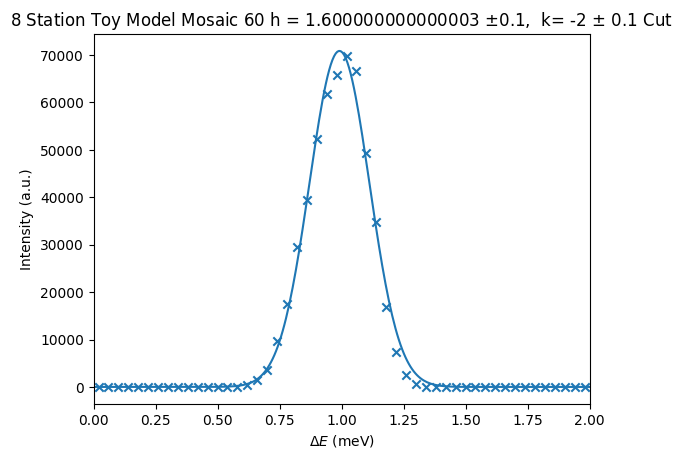

{'amplitude': 32964.65804676072, 'center': 0.7845273264953555, 'sigma': 0.12301895048579614}


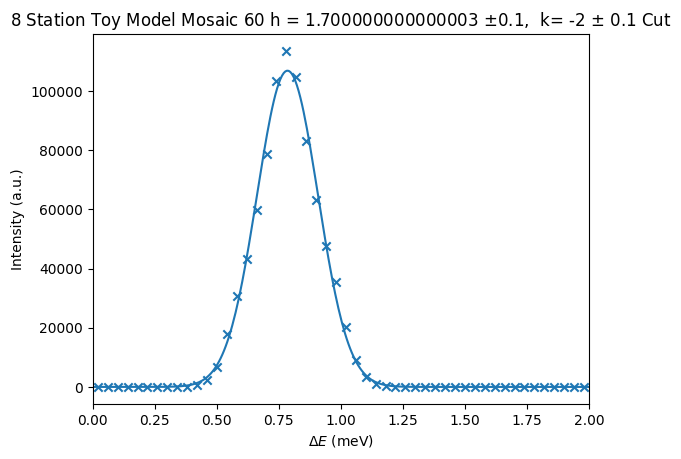

{'amplitude': 53007.79959621817, 'center': 0.5500684576428422, 'sigma': 0.1300068416857234}


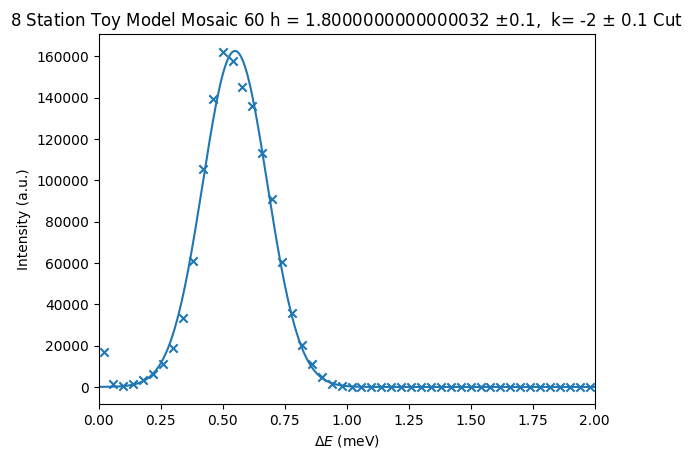

In [81]:

xvals = []
yvals = []
for num in np.arange(-1.8, 1.81, 0.1):
    xvals.append(round(num, 1))
    ypoint = sliceGenerator1D("Etransferred", num, -2, "N/A")['sigma']
    yvals.append(ypoint*2.355)
    

[0.33915667 0.35102947 0.31497409 0.30126334 0.25557543 0.20350322
 0.18047526 0.16314511 0.14844271 0.16706359 0.19163407 0.20469293
 0.28027535 0.28290055 0.34157162 0.34643199 0.3722889  0.41059572
 0.6104942  0.34894906 0.31984917 0.26993746 0.25464612 0.22172787
 0.21451372 0.17654045 0.16601879 0.153153   0.1549366  0.16909309
 0.18049451 0.19071004 0.23050201 0.21884992 0.28462875 0.28970963
 0.30616611]


Text(0.5, 1.0, 'Energy Resolution Across ($Q_x$, $Q_y = $ -2 $\\pm$ 0.1 $\\AA^{-1}$, 0)')

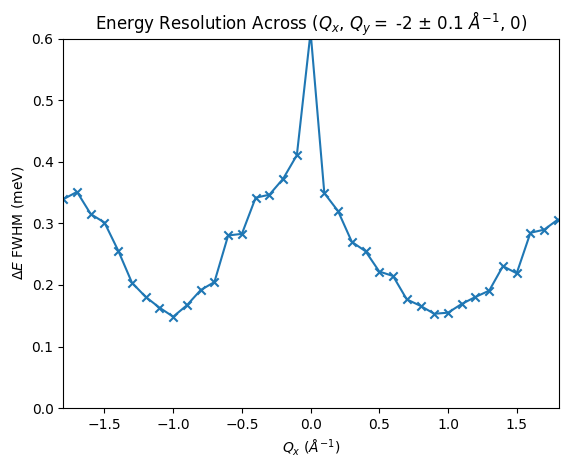

In [82]:
yvals = np.array(yvals)
plt.scatter(xvals, yvals, marker  = "x")
plt.plot(xvals, yvals)
plt.xlim(-1.8, 1.81)
plt.ylim(0, 0.6)
print(yvals)
plt.xlabel("$Q_x$ $(\AA^{-1})$")
plt.ylabel("$\Delta E$ FWHM (meV)")
plt.title("Energy Resolution Across ($Q_x$, $Q_y = $ -2 $\pm$ 0.1 $\AA^{-1}$, 0)")

[-1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]
36


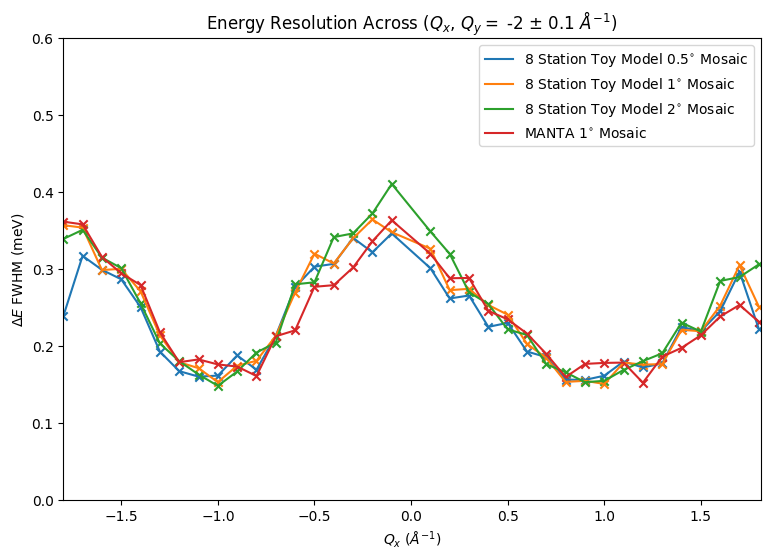

In [84]:
TM05 = [0.23871136, 0.31724784, 0.29908214, 0.28682079, 0.25063335, 0.19287367,
 0.16750765, 0.16039976, 0.16167821, 0.18785033, 0.16936935, 0.21356849,
 0.27643794, 0.30317285, 0.30680182, 0.34055836, 0.32182982, 0.34636781,
 0.2523331,  0.30123797, 0.26188535, 0.26572072, 0.22497985, 0.23022788,
 0.19298081, 0.18565243, 0.15656478, 0.15612606, 0.16159142, 0.18000683,
 0.17226792, 0.17757152, 0.22474933, 0.21935076, 0.24542325, 0.29664037,
 0.22224063]
"""TM05 = [0.2322003,  0.25915782, 0.22343699, 0.21651621, 0.17820844, 0.17236873,
 0.15177853, 0.14236884, 0.13329012, 0.15596331, 0.15895346, 0.20397517,
 0.21471568, 0.2852997,  0.25925295, 0.30373263, 0.27210531, 0.31023462,
 0.21056355, 0.255268,   0.21824949, 0.26190952, 0.21034936, 0.20151471,
 0.1776238,  0.17025838, 0.14828054, 0.1392532,  0.13687449, 0.15413355,
 0.15874509, 0.17824509, 0.19975555, 0.23540921, 0.2457046,  0.27984089,
 0.18002154]
"""
"""
##Below is the original, from data that used a monochromatic source
TM1 = [0.24839479, 0.24315038, 0.22622657, 0.21622873, 0.19358545, 0.16562901,
 0.15313485, 0.14528522, 0.1454029,  0.16019447, 0.16790822, 0.19364284,
 0.22369331, 0.25524547, 0.24860548, 0.28722982, 0.31213722, 0.31961517,
 0.1848362,  0.30193008, 0.23031901, 0.2217947,  0.2115907,  0.18586201,
 0.17960617, 0.16023178, 0.15058259, 0.14534379, 0.14456771, 0.15469745,
 0.15917472, 0.16713933, 0.20546739, 0.21817273, 0.25238383, 0.27546512,
 0.25092121]
 """

## Source radius too large!
#below is the nonmonochromatic source, but the calibration was from a monochromatic source
"""
TM1 = [0.25400786, 0.37311145, 0.441688,   0.29682415, 0.36558251, 0.29648109,
 0.27623266, 0.27878486, 0.21571295, 0.24577013, 0.20747193, 0.27842536,
 0.28068126, 0.42163993, 0.25509301, 0.32448477, 0.28646771, 0.33533812,
 0.15910148, 0.1657042,  0.16947177, 0.28867247, 0.21562155, 0.20787729,
 0.23604982, 0.25036926, 0.19867817, 0.22978898, 0.23779737, 0.21511354,
 0.28747231, 0.19035252, 0.31641786, 0.33345319, 0.43801238, 0.25261606,
 0.24444991]
"""

## Source Radius too large!
##Below is the nonchromatic source, and the calibration was from a nonmonochromatic source
"""
TM1 = [0.29108575, 0.36013767, 0.45352121, 0.31599716, 0.36540367, 0.28922104,
 0.28943372, 0.27526302, 0.25648386, 0.26669203, 0.2216544,  0.29651529,
 0.30574545, 0.45355022, 0.30206111, 0.34618837, 0.35958399, 0.41299466,
 0.30043077, 0.12021337, 0.25236924, 0.31781104, 0.27401424, 0.25537195,
 0.25906344, 0.25680974, 0.21771555, 0.22714876, 0.26176526, 0.2317705,
 0.29678933, 0.22546756, 0.32984866, 0.369691,   0.46477036, 0.27976758,
 0.3438358 ]
"""

TM1 = [0.35710039, 0.35390219, 0.29883988, 0.3003187, 0.27120237, 0.21400486,
 0.1790989,  0.17137597, 0.15325632, 0.17450499, 0.18097067, 0.21335447,
 0.26961462, 0.32005904, 0.30726996, 0.34010194, 0.36453791, 0.34792806,
 0.27050384, 0.32653435, 0.27267544, 0.27444474, 0.25344193, 0.24080541,
 0.2030137,  0.18462669, 0.15348119, 0.15496248, 0.15087169, 0.17856988,
 0.17598027, 0.17666244, 0.22124182, 0.21931124, 0.25262712, 0.30516191,
 0.25129773]




TM2 = [0.33915667, 0.35102947, 0.31497409, 0.30126334, 0.25557543, 0.20350322,
 0.18047526, 0.16314511, 0.14844271, 0.16706359, 0.19163407, 0.20469293,
 0.28027535, 0.28290055, 0.34157162, 0.34643199, 0.3722889,  0.41059572,
 0.6104942,  0.34894906, 0.31984917, 0.26993746, 0.25464612, 0.22172787,
 0.21451372, 0.17654045, 0.16601879, 0.153153,   0.1549366,  0.16909309,
 0.18049451, 0.19071004, 0.23050201, 0.21884992, 0.28462875, 0.28970963,
 0.30616611]
"""
TM2 = [0.29430587, 0.41785545, 0.40035342, 0.3192117,  0.31225127, 0.24175389,
 0.22360695, 0.23495237, 0.20963218, 0.20352545, 0.26968556, 0.26105652,
 0.38083186, 0.34524516, 0.37330483, 0.35151789, 0.40633192, 0.35769154,
 0.49956334, 0.38951472, 0.35543234, 0.34467865, 0.28093296, 0.25071645,
 0.25156106, 0.21641164, 0.24623632, 0.20294117, 0.21071534, 0.2288887,
 0.2257712,  0.217169,   0.26810163, 0.30034413, 0.31641227, 0.34274945,
 0.31982871]
"""
"""
TM2 = [0.26495087, 0.25459462, 0.23384268, 0.20457744, 0.20200084, 0.16027169,
 0.16404347, 0.14545463, 0.14387972, 0.16373128, 0.17683464, 0.18624565,
 0.24173691, 0.24703044, 0.2747197,  0.30635215, 0.32327552, 0.37965557,
 0.49537171, 0.31558634, 0.25592687, 0.2445124,  0.22939239, 0.19111008,
 0.19468424, 0.15502346, 0.15257267, 0.14638025, 0.15001836, 0.15775355,
 0.17126669, 0.16651532, 0.21278569, 0.2042744,  0.26342346, 0.27470173,
 0.27825016]
"""

FM1 = [0.36165141, 0.3581251,  0.31581269, 0.29453899, 0.27930393, 0.21789669,
 0.17912687, 0.18273523, 0.1762296,  0.17347639, 0.16115708, 0.2127947,
 0.22050339, 0.27705904, 0.27916123, 0.30211952, 0.33620772, 0.36344288,
 0.22334021, 0.32005845, 0.28815012, 0.2885178,  0.24580932, 0.23478791,
 0.21630132, 0.18979688, 0.15982939, 0.17689597, 0.17820481, 0.17861675,
 0.15244191, 0.18631251, 0.19776099, 0.21411156, 0.23849614, 0.25346698,
 0.23154097]
"""
TM05 = [0.23669209, 0.26295646, 0.22347986, 0.21419578, 0.17482874, 0.17408974,
 0.15247207, 0.14059794, 0.13387413, 0.15575315, 0.15824636, 0.20647951,
 0.21509052, 0.28450125, 0.26203679, 0.2980712,  0.2853677,  0.30632744,
 0.20914125, 0.2555759,  0.22254497, 0.26137459, 0.20903766, 0.20265094,
 0.17875,    0.16957234, 0.14734862, 0.14031721, 0.13689421, 0.15269344,
 0.15746836, 0.18118373, 0.20200559, 0.23228038, 0.238983,   0.27210367,
 0.19029633]

TM1 = [0.25430256, 0.24399766, 0.22880103, 0.2109933,  0.19300386, 0.16560963,
 0.15287297, 0.14532167, 0.14329403, 0.15859553, 0.16786484, 0.19173,
 0.22504023, 0.25653614, 0.2477369,  0.28818991, 0.3073792,  0.32420674,
 0.18784594, 0.29701504, 0.23156657, 0.22242571, 0.2103631,  0.18875843,
 0.17860107, 0.16040214, 0.14980128, 0.14382975, 0.14321905, 0.15326764,
 0.15900196, 0.16614076, 0.20458547, 0.2210668,  0.25030784, 0.26728841,
 0.23744919]

TM2 = [0.26594129, 0.25399578, 0.23573207, 0.20259677, 0.20155551, 0.15978813,
 0.16457744, 0.14423121, 0.14283196, 0.16245318, 0.17746747, 0.18564609,
 0.24068017, 0.24546475, 0.27739821, 0.30418171, 0.323401,   0.3887801,
 0.49997142, 0.32378337, 0.25582276, 0.2440306, 0.23142987, 0.18908028,
 0.1942442,  0.15432347, 0.15292535, 0.14528856, 0.14909917, 0.15647836,
 0.17174386, 0.16605457, 0.21229549, 0.20248055, 0.26603535, 0.27352339,
 0.27789531]

FM1 = [0.36178671, 0.35893402, 0.31477855, 0.29458149, 0.28032488, 0.21725031,
 0.1799749,  0.18250547, 0.17395746, 0.17258232, 0.16093854, 0.21231084,
 0.22042868, 0.27630926, 0.27860239, 0.30104709, 0.33636516, 0.36492758,
 0.22378579, 0.32141155, 0.28822001, 0.28870866, 0.24549649, 0.23379679,
 0.21715647, 0.18909911, 0.16023618, 0.17658956, 0.17669057, 0.17799826,
 0.15242415, 0.18600017, 0.19856657, 0.21317093, 0.23834084, 0.25300316,
 0.23406591]
 """
##All of the values below were replaced 1/17/24
"""
TM05 = [0.29659043, 0.25267344, 0.21915517, 0.21842683, 0.16800043, 0.17152596,
 0.1493852,  0.14381052, 0.14493113, 0.15463778, 0.15799645, 0.22708646,
 0.22973251, 0.2980792,  0.27477015, 0.32357936, 0.3113351,  0.35128992,
 0.23597976, 0.28594073, 0.28489375, 0.310839,   0.22829817, 0.22771719,
 0.19881999, 0.19574768, 0.14857571, 0.14550111, 0.14841731, 0.14924781,
 0.15823009, 0.18299235, 0.23387293, 0.29151359, 0.2652021,  0.27204252,
 0.20900859]

TM1 = [0.27492775, 0.23763851, 0.23968484, 0.20135621, 0.20038659, 0.16426931,
 0.15124047, 0.1454316,  0.15085189, 0.15818856, 0.16528445, 0.20042607,
 0.24248626, 0.27243981, 0.27172202, 0.30349917, 0.30285553, 0.33744506,
 0.25452878, 0.30081716, 0.30672119, 0.26462521, 0.24211144, 0.22564822,
 0.19269595, 0.18281483, 0.15123306, 0.1500386,  0.14517407, 0.15522828,
 0.16702468, 0.18139284, 0.22995472, 0.27400113, 0.27807443, 0.28661014,
 0.24754362]

TM2 = [0.28464789, 0.25124949, 0.23954978, 0.20608502, 0.19524987, 0.15324504,
 0.15821774, 0.1489873,  0.1511239,  0.16285093, 0.17374016, 0.1949508,
 0.25353971, 0.26795289, 0.28925666, 0.31085838, 0.33353202, 0.31721313,
 0.3237184,  0.29369094, 0.30992226, 0.25905668, 0.24363017, 0.21733333,
 0.20302922, 0.17656757, 0.15441181, 0.14891372, 0.15183129, 0.15706815,
 0.17370293, 0.16754157, 0.24368133, 0.26149718, 0.2811096,  0.27845897,
 0.29295497]



FM1 = [0.37689673, 0.38966518, 0.33188001, 0.30811219, 0.30535059, 0.2228841,
 0.20708704, 0.19986741, 0.16940863, 0.17941182, 0.1555779,  0.19668534,
 0.23456155, 0.26911169, 0.29340807, 0.31887183, 0.32794428, 0.37593677,
 0.28975923, 0.36492441, 0.37026364, 0.35752264, 0.28839055, 0.27466943,
 0.25379277, 0.18774668, 0.17490242, 0.17965415, 0.18490365, 0.19604638,
 0.15496957, 0.17429627, 0.22473643, 0.24682447, 0.28303005, 0.32628635,
 0.31130193]

MJOLNIR_TM1 = [0.36065849, 0.2996627,  0.31984853, 0.26213201, 0.19133917, 0.08965568,
 0.0972592,  0.09424305, 0.17818502, 0.10473534, 0.09174851, 0.09380324,
 0.24662283, 0.33498142, 0.35598534, 0.31748039, 0.39784022, 0.0156305,
 0.01573933, 0.37739286, 0.35311586, 0.29642502, 0.30172506, 0.26856822,
 0.20478652, 0.21434734, 0.09753022, 0.10416391, 0.16932001, 0.08781194,
 0.10505019, 0.10508141, 0.2253272,  0.31776515, 0.31274055, 0.30596095,
 0.42198914]

"""
#All of the values below were replaced 10/6/23
"""
TM05 = [0.20714179, 0.13478166, 0.20039356, 0.2631366,  0.07224092, 0.13502306,
 0.14297412, 0.07757895, 0.12785286, 0.15080736, 0.13697182, 0.20708233,
 0.20983827, 0.20493893, 0.34294887, 0.4285183,  0.40693717, 0.24038776,
 0.17491455, 0.19417788, 0.23044285, 0.3393806,  0.22565483, 0.21157021,
 0.16787109, 0.12727948, 0.10995561, 0.1471935,  0.23269829, 0.14786846,
 0.19546638, 0.00720226, 0.1708074,  0.22238516, 0.17952946, 0.29120931,
 0.31611375]
TM1 = [0.20880116, 0.12905709, 0.222045,   0.24687898, 0.09666856, 0.15561288,
 0.15138267, 0.08097253, 0.15937352, 0.17971578, 0.13824587, 0.21935291,
 0.23565932, 0.24264501, 0.28116349, 0.41473005, 0.38017491, 0.34056531,
 0.14677714, 0.28204169, 0.2875074,  0.29688815, 0.24204703, 0.24282196,
 0.1760217,  0.11497666, 0.09824591, 0.16690918, 0.23630926, 0.16531892,
 0.21710078, 0.12906607, 0.17593657, 0.25185219, 0.20447194, 0.35461956,
 0.32443141]
TM2 = [0.19401452, 0.117637,   0.20419206, 0.22671914, 0.09653442, 0.14295733,
 0.14902173, 0.07114965, 0.16628074, 0.16189438, 0.14233842, 0.20988309,
 0.2459833,  0.199196,   0.29894949, 0.39968602, 0.38015199, 0.3399968,
 0.25490924, 0.10018415, 0.26705749, 0.34338325, 0.20589283, 0.18496679,
 0.18712984, 0.10702178, 0.10520821, 0.15210721, 0.22650387, 0.1626429,
 0.21144356, 0.09442659, 0.17970828, 0.26019394, 0.21173604, 0.33460143,
 0.32621716]
#FM1 = [0.41351184, 0.42438377, 0.37508925, 0.33497183, 0.33089659, 0.23205105,
# 0.18773326, 0.18913631, 0.15779237, 0.1535736,  0.1538252,  0.24620641,
# 0.21024633, 0.29000074, 0.24449689, 0.30256309, 0.30147362, 0.43754758,
# 0.09195549, 0.37884795, 0.37983158, 0.35192413, 0.31191578, 0.34695624,
# 0.22428121, 0.20111839, 0.18337164, 0.17481399, 0.21709678, 0.17936499,
# 0.16535983, 0.17518139, 0.19787063, 0.28597172, 0.20422594, 0.350844,
# 0.43779687]
"""
##Older One
#FM1 = [0.37399022, 0.41181104, 0.3755261,  0.34267774, 0.33964305, 0.218536,
# 0.18280372, 0.18667149, 0.15502167, 0.15657047, 0.15831323, 0.24722447,
# 0.22777037, 0.28668837, 0.25963497, 0.33099009, 0.29992711, 0.46202658,
# 0.10183738, 0.36727514, 0.36287635, 0.35483281, 0.29485651, 0.31672899,
# 0.22571964, 0.20230136, 0.18541252, 0.17729055, 0.2176074,  0.18775462,
# 0.16650258, 0.16044195, 0.21295616, 0.30298548, 0.19806353, 0.36480676,
# 0.38012289]

#newxVals = xvals
xvals = []
for num in np.arange(-1.8, 1.81, 0.1):
    xvals.append(round(num, 1))
if -0.1 in xvals:
    for num in range(1):
        xvals.remove(xvals[18])
        TM05.remove(TM05[18])
        TM1.remove(TM1[18])
        TM2.remove(TM2[18])
        #MJOLNIR_TM1.remove(MJOLNIR_TM1[18])
        FM1.remove(FM1[18])
#newxVals.remove((17, 18, 19))
#print(len(newxVals))
print(xvals)
print(len(TM05))
#print(newxVals.index(-0.1))
plt.figure(figsize = (9,6))
plt.scatter(xvals, TM05, marker  = "x")
plt.plot(xvals, TM05, label = "8 Station Toy Model $0.5^{\circ}$ Mosaic")
plt.scatter(xvals, TM1, marker  = "x")
plt.plot(xvals, TM1, label = "8 Station Toy Model $1^{\circ}$ Mosaic")
plt.scatter(xvals, TM2, marker  = "x")
plt.plot(xvals, TM2, label = "8 Station Toy Model $2^{\circ}$ Mosaic")
plt.scatter(xvals, FM1, marker  = "x")
plt.plot(xvals, FM1, label = "MANTA $1^{\circ}$ Mosaic")
for num in range(1):
        xvals.remove(xvals[17])
        #MJOLNIR_TM1.remove(MJOLNIR_TM1[17])
#plt.scatter(xvals, MJOLNIR_TM1, marker  = "x")
#plt.plot(xvals, MJOLNIR_TM1, label = "8 Station Toy Model $1^{\circ}$ Mosaic Using MJOLNIR")


plt.xlim(-1.8, 1.81)
plt.ylim(0, 0.6)
plt.legend()
plt.xlabel("$Q_x$ $(\AA^{-1})$")
plt.ylabel("$\Delta E$ FWHM (meV)")
plt.title("Energy Resolution Across ($Q_x$, $Q_y = $ -2 $\pm$ 0.1 $\AA^{-1}$)")
path =f"D:/Users/Adit/Figures/2024 Updated Figures/Detector_Different_2theta/Energy Resolution Cuts Vol 11 {today}.pdf"
if os.path.isfile(path):
    print("File exists! Pick a new name")
else:
    plt.savefig(path, format="pdf")
plt.show()

In [71]:
""" 
8 Station Mosaic 30 [0.20714179, 0.13478166, 0.20039356, 0.2631366,  0.07224092, 0.13502306,
 0.14297412, 0.07757895, 0.12785286, 0.15080736, 0.13697182, 0.20708233,
 0.20983827, 0.20493893, 0.34294887, 0.4285183,  0.40693717, 0.24038776,
 0.17491455, 0.19417788, 0.23044285, 0.3393806,  0.22565483, 0.21157021,
 0.16787109, 0.12727948, 0.10995561, 0.1471935,  0.23269829, 0.14786846,
 0.19546638, 0.00720226, 0.1708074,  0.22238516, 0.17952946, 0.29120931,
 0.31611375]

8 Station Mosaic 60 [0.20880116 0.12905709 0.222045   0.24687898 0.09666856 0.15561288
 0.15138267 0.08097253 0.15937352 0.17971578 0.13824587 0.21935291
 0.23565932 0.24264501 0.28116349 0.41473005 0.38017491 0.34056531
 0.14677714 0.28204169 0.2875074  0.29688815 0.24204703 0.24282196
 0.1760217  0.11497666 0.09824591 0.16690918 0.23630926 0.16531892
 0.21710078 0.12906607 0.17593657 0.25185219 0.20447194 0.35461956
 0.32443141]
 
 8 Station Mosaic 120 [0.19401452 0.117637   0.20419206 0.22671914 0.09653442 0.14295733
 0.14902173 0.07114965 0.16628074 0.16189438 0.14233842 0.20988309
 0.2459833  0.199196   0.29894949 0.39968602 0.38015199 0.3399968
 0.25490924 0.10018415 0.26705749 0.34338325 0.20589283 0.18496679
 0.18712984 0.10702178 0.10520821 0.15210721 0.22650387 0.1626429
 0.21144356 0.09442659 0.17970828 0.26019394 0.21173604 0.33460143
 0.32621716]
 
 MANTA [0.37399022 0.41181104 0.3755261  0.34267774 0.33964305 0.218536
 0.18280372 0.18667149 0.15502167 0.15657047 0.15831323 0.24722447
 0.22777037 0.28668837 0.25963497 0.33099009 0.29992711 0.46202658
 0.10183738 0.36727514 0.36287635 0.35483281 0.29485651 0.31672899
 0.22571964 0.20230136 0.18541252 0.17729055 0.2176074  0.18775462
 0.16650258 0.16044195 0.21295616 0.30298548 0.19806353 0.36480676
 0.38012289]"""

' \n8 Station Mosaic 30 [0.20714179, 0.13478166, 0.20039356, 0.2631366,  0.07224092, 0.13502306,\n 0.14297412, 0.07757895, 0.12785286, 0.15080736, 0.13697182, 0.20708233,\n 0.20983827, 0.20493893, 0.34294887, 0.4285183,  0.40693717, 0.24038776,\n 0.17491455, 0.19417788, 0.23044285, 0.3393806,  0.22565483, 0.21157021,\n 0.16787109, 0.12727948, 0.10995561, 0.1471935,  0.23269829, 0.14786846,\n 0.19546638, 0.00720226, 0.1708074,  0.22238516, 0.17952946, 0.29120931,\n 0.31611375]\n\n8 Station Mosaic 60 [0.20880116 0.12905709 0.222045   0.24687898 0.09666856 0.15561288\n 0.15138267 0.08097253 0.15937352 0.17971578 0.13824587 0.21935291\n 0.23565932 0.24264501 0.28116349 0.41473005 0.38017491 0.34056531\n 0.14677714 0.28204169 0.2875074  0.29688815 0.24204703 0.24282196\n 0.1760217  0.11497666 0.09824591 0.16690918 0.23630926 0.16531892\n 0.21710078 0.12906607 0.17593657 0.25185219 0.20447194 0.35461956\n 0.32443141]\n \n 8 Station Mosaic 120 [0.19401452 0.117637   0.20419206 0.22671914 0.09

In [26]:
xvals = []
neg1s = []
pos1s = []
for num in np.arange(0.5, 1.51, 0.1):
    xvals.append(num)
    values = sliceGenerator1D("Qx", "N/A", -2, num)
    g1Val = values['g1_sigma'] * 2.355
    g2Val = values['g2_sigma'] * 2.355
    if values['g1_center'] < 1.0:
        neg1s.append(g1Val)
    else:
        pos1s.append(g1Val)
    if values['g2_center'] < 1.0:
        neg1s.append(g2Val)
    else:
        pos1s.append(g2Val)
    if len(neg1s) != len(pos1s):
        print(num)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Administrator\.julia\conda\3\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_36752\800233566.py", line 6, in <module>
    values = sliceGenerator1D("Qx", "N/A", -2, num)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_36752\4217352085.py", line -1, in sliceGenerator1D
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Administrator\.julia\conda\3\lib\site-packages\IPython\core\interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Administrator\.julia\conda\3\lib\site-packages\IPython\core\ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Administrator\.julia\conda\3\lib\site

11
[0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.1999999999999997, 1.2999999999999998, 1.4, 1.4999999999999998]
11
[0.14286388200711866, 0.13392325695801688, 0.1315130755511143, 0.1288684063549381, 0.13699798801795357, 0.12942792216749593, 0.13731876315619215, 0.1298869199905969, 0.13464653475073393, 0.18665566631691996, 0.22613866896248097]
11
11


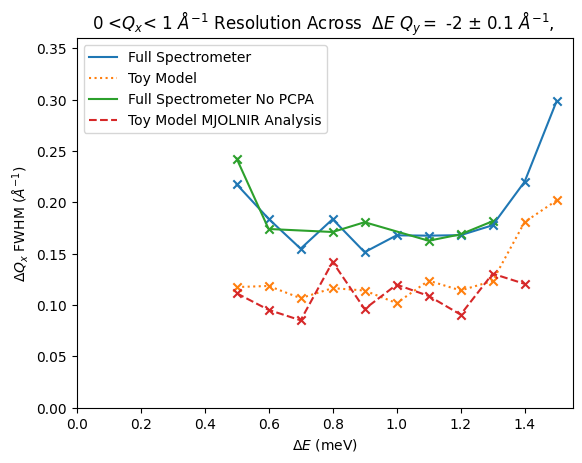

In [12]:
print(len(xvals))
print(xvals)
#rint(len(neg1s))
print(len(pos1s))
print(pos1s)
fullMANTApos1s = [0.18031810314619587, 0.1658278398670686, 0.15124179483415362, 0.15517261102392768, 0.15587046570173296, 0.15002339855053476, 0.15093859133500728, 0.14944516492085985, 0.14341858178475825, 0.19491603883284364, 0.20003948356977921]
fullMANTAneg1s = [0.21765449906285966, 0.1839812772387363, 0.15493313915849719, 0.18366224059805267, 0.15152725173219267, 0.16790770823683038, 0.16760284290853206, 0.16807122930234797, 0.17773186555122292, 0.22015220874486582, 0.2986817733105236]

#fullMANTApos1s = [0.15649204953202728, 0.14236522647199412, 0.13845948422319818, 0.12724733577487551, 0.1532288760143082, 0.13895222512741656, 0.1443855907051017, 0.14054490551488133, 0.15311623303488728, 0.18761521750511634, 0.22648955779177063]
#Values replaced 10/2/23
#fullMANTApos1s = [0.14877422175569177, 0.11591919089095233, 0.13035322035809446, 0.1281957402002668, 0.13040528183120806, 0.10397350139060377, 0.15018288464094165, 0.09743417484782017, 0.15224220168516595, 0.23302808811621817, 0.2353858900066483]
#fullMANTAneg1s = [0.16211284110121887, 0.1488106616939877, 0.14271505235352355, 0.17857494169362353, 0.08156508111260195, 0.16777081540074595, 0.16650295755871547, 0.15787439372673323, 0.14566127499230846, 0.21846261001149406, 0.2243649334178082]
#Old Ones
#fullMANTApos1s = [0.12043071272269534, 0.08892096298043535, 0.10758244028894431, 0.09732348417499641, 0.12926732054409407, 0.1131271335268691, 0.14995438451010012, 0.0962347527963343, 0.1540786536581408, 0.2047111669170891, 0.26684114165610495]
#fullMANTAneg1s = [0.15728624076175934, 0.1597803246792873, 0.1341675350877231, 0.1762382829706764, 0.07919736154052419, 0.15984970978456783, 0.17191689889100356, 0.14080601230667, 0.1505300979528694, 0.22570132346647465, 0.21921698419101524]
fullMANTAxs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
print(len(fullMANTAxs))
print(len(fullMANTApos1s))
#plt.scatter(fullMANTAxs, fullMANTAneg1s, marker  = "x", c = "black")
plt.scatter(fullMANTAxs, fullMANTAneg1s, marker = "x")
#plt.plot(fullMANTAxs, fullMANTAneg1s, c = "black", label="Full Spectrometer $Q_x$ < 1", linestyle = "solid")
plt.plot(fullMANTAxs, fullMANTAneg1s, label = "Full Spectrometer")


plt.scatter(xvals, neg1s, marker  = "x")
#plt.scatter(xvals, pos1s, marker = "x")
plt.plot(xvals, neg1s, label="Toy Model", linestyle = "dotted")
#plt.plot(xvals, pos1s, label = "Toy Model", linestyle = "dotted")

noPCPAxVals = [0.5, 0.6, 0.7999999999999999, 0.8999999999999999, 1.0999999999999999, 1.1999999999999997, 1.2999999999999998]
noPCPAneg1s = [0.24272951024132847, 0.17409495480136142, 0.17116130230160392, 0.18069527170144264, 0.1626531018877359, 0.16889761273770798, 0.1816554892174342]
plt.scatter(noPCPAxVals, noPCPAneg1s, marker = "x")
plt.plot(noPCPAxVals, noPCPAneg1s, label = "Full Spectrometer No PCPA")

mjolnirTMxvals = [0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.1999999999999997, 1.2999999999999998, 1.4]
mjolnirTMneg1s = [0.11151668520348242, 0.09529814954112226, 0.08513867047802266, 0.14202515256571968, 0.09614029584406178, 0.11986579599992399, 0.10891804168654148, 0.09067907942516804, 0.13055651628722503, 0.12064284675772448]
plt.scatter(mjolnirTMxvals, mjolnirTMneg1s, marker = "x")
plt.plot(mjolnirTMxvals, mjolnirTMneg1s, label = "Toy Model MJOLNIR Analysis", linestyle = "dashed")

plt.xlim(0.0, )
plt.ylim(0, 0.36)
#print(yvals)
plt.xlabel("$\Delta E$ (meV)")
plt.legend()
plt.ylabel("$\Delta Q_x$ FWHM $(\AA^{-1})$")
plt.title("0 <$Q_x$< 1 $\AA^{-1}$ Resolution Across  $\Delta E$ $Q_y = $ -2 $\pm$ 0.1 $\AA^{-1}$, ")
plt.show()

In [129]:
"""
xAxisScatter = []
    yAxisScatter = []
    pairs = []      
    bigdict = {}
    if parameter == "Qx":
        for num in range(0, 201, 5):
            num = num / 100
            bigdict[num] = 0
        #for tup in tuplist:
        #    if tup[-1] <= (qyVal + 0.05) and tup [-1] >= (qyVal - 0.05):
        #        if tup[1] <= (eTransferredVal + 0.02) and tup[1] >= (eTransferredVal -0.02):
        #           xAxisScatter.append(tup[-2])
        #           yAxisScatter.append(tup[2])
        #           pairs.append((tup[-2], tup[2]))
        for key in bigdict:
            for tup in tuplist:
                    if tup[1] <= eTransferredVal+.025 and tup[1] >= eTransferredVal-0.025:
                        if tup[-1] > qyVal - 0.03 and tup[-1] < qyVal + 0.03:
                        # print(tup)
                        # print(bigdict[key][tup[1]])
                            if tup[-2] <= key +0.025 and tup[-2] >= key - 0.025:
                                bigdict[key] += tup[2]

        xAxisScatter = []
        yAxisScatter = []                        
        
        for key in bigdict:
            xAxisScatter.append(key)
            yAxisScatter.append(bigdict[key])
        
        xAxisScatter = np.array(xAxisScatter)
        yAxisScatter = np.array(yAxisScatter)
        plt.xlabel("$h$")
        
        plt.ylabel("Intensity (a.u.)")
        plt.scatter(xAxisScatter, yAxisScatter, marker = "x")
        #plt.show()
        pairs.sort()

    

        i_pk, _ = scipy.signal.find_peaks(yAxisScatter, prominence=5, distance=4)
        
        """
        for i in range(len(i_pk)):
            if i != (len(i_pk) -1):
                if i_pk[i+1] - i_pk[i] <= 2:
                    fakePeakIndices.append(i)
        print(i_pk)
        print(fakePeakIndices)
        i_pk = np.delete(i_pk, fakePeakIndices)
        """
        print(i_pk)
        gaussMod = GaussianModel()
        pars = gaussMod.guess(data=yAxisScatter, x= xAxisScatter)
        modList = []
        for i in range(len(i_pk)):
            val = i_pk[i]
            gauss = GaussianModel(prefix='g' + str(i+1) + '_')
            pars.update(gauss.make_params())
            pars['g' + str(i+1) + '_center'].set(xAxisScatter[val])
            pars['g' + str(i+1) + '_sigma'].set(0.01)
            pars['g' + str(i+1) + '_amplitude'].set(yAxisScatter[val])
            modList.append(gauss)
        modArray = np.array(modList)
        mod = np.sum(modArray)
        init = mod.eval(pars, x=xAxisScatter)
        #plt.plot(myBins, init)
        out = mod.fit(yAxisScatter, pars, x=xAxisScatter)
        print(out.fit_report())
        x = np.linspace(0, 200, 100)
        plt.plot(x, out.best_fit)
        #for thing in pairs:
         #   xAxisScatter.append(thing[0])
         #   yAxisScatter.append(thing[1])
        
        xAxisScatter = np.array(xAxisScatter)
        yAxisScatter = np.array(yAxisScatter)
        #plt.plot(xAxisScatter, yAxisScatter)
        plt.xlabel("h")
        plt.ylabel("Intensity (a.u.)")
        plt.title("8 Station Toy Model Mosaic 60 $\Delta E = $" +str(eTransferredVal) + " meV $\pm$ $ 0.1$ $k = $ " + str(qyVal) + '$\pm$ $ 0.1$')
        plt.title
        plt.show()
        return out.best_values
    """

IndentationError: unexpected indent (1939265047.py, line 2)